# **Emission de CO2 par les véhicules - EDA & Pre-processing**

## 0. Import des modules et sous modules

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api
from scipy.stats import randint

In [281]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.inspection import permutation_importance

from plotly.subplots import make_subplots
from sklearn import preprocessing

In [283]:
from sklearn.linear_model import LinearRegression,RidgeCV, Lasso, LassoCV, ElasticNetCV, Ridge, SGDRegressor, ElasticNet 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor # regressor = DecisionTreeRegressor(random_state=0)
from sklearn.neural_network import MLPRegressor


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report, r2_score, mean_squared_error, root_mean_squared_error

## 1. Chargement des différents datasets

##### https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/#_
##### https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-20

In [286]:
data_2013 = pd.set_option('display.max_row', 40)
data_2013 = pd.set_option('display.max_column', 40)
data_2014 = pd.set_option('display.max_row', 40)
data_2014 = pd.set_option('display.max_column', 40)
data_2015 = pd.set_option('display.max_row', 40)
data_2015 = pd.set_option('display.max_column', 40)
data_2022 = pd.set_option('display.max_row', 40)
data_2022 = pd.set_option('display.max_column', 40)

In [287]:
data_2013 = pd.read_csv('DataProjetCO2_2013.csv', sep = ';', encoding='ISO-8859-1')
data_2014 = pd.read_csv('DataProjetCO2_2014.csv', sep = ';', encoding='ISO-8859-1')
data_2015 = pd.read_csv('DataProjetCO2_2015.csv', sep = ';', encoding='ISO-8859-1')
data_2022 = pd.read_csv('DataProjetCO2_eea_2022.csv', sep = ',', encoding='ISO-8859-1')

df_2013 = data_2013.copy()
df_2014 = data_2014.copy()
df_2015 = data_2015.copy()
df_2022 = data_2022.copy()

C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\3234492346.py:4: DtypeWarning: Columns (3,8,10,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv('DataProjetCO2_eea_2022.csv', sep = ',', encoding='ISO-8859-1')


In [288]:
df_2013.head()

Marque Modèle dossier Modèle UTAC   Désignation commerciale  \
0  ALFA-ROMEO            159         159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO            159         159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO            159         159      159 2.0 JTDm (170ch)   

              CNIT Type Variante Version (TVV) Carburant Hybride  \
0  M10ALFVP000G340                 939AXN1B52C        ES     non   
1  M10ALFVP000U221                 939AXP1B54C        GO     non   
2  M10ALFVP000E302                  939AXR1B64        GO     non   
3  M10ALFVP000F303                 939AXR1B64B        GO     non   
4  M10ALFVP000G304                  939AXS1B66        GO     non   

   Puissance administrative  Puissance maximale (kW) Boîte de vitesse  \
0                        12                    147.0              M 6   
1                         9                    125.0              M 6   
2                         7                    100.0              M 6   
3                         7                    100.0              M 6   
4                         9                    125.0              M 6   

   Consommation urbaine (l/100km)  Consommation extra-urbaine (l/100km)  \
0                            11.3                                   5.8   
1                             6.6                                   4.3   
2                             6.6                                   4.2   
3                             6.6                                   4.2   
4                             6.9                                   4.3   

   Consommation mixte (l/100km)  CO2 (g/km)  CO type I (g/km)  HC (g/km)  \
0                           7.8       182.0             0.647      0.052   
1                           5.1       136.0             0.192        NaN   
2                           5.1       134.0             0.066        NaN   
3                           5.1       134.0             0.066        NaN   
4                           5.3       139.0             0.060        NaN   

   NOX (g/km)  HC+NOX (g/km)  Particules (g/km)  masse vide euro min (kg)  \
0       0.032            NaN              0.002                      1505   
1       0.169          0.190              0.003                      1565   
2       0.149          0.175              0.001                      1565   
3       0.149          0.175              0.001                      1565   
4       0.164          0.193              0.001                      1565   

   masse vide euro max (kg)                Champ V9 Date de mise à jour  \
0                      1505  715/2007*692/2008EURO5             juin-13   
1                      1565  715/2007*692/2008EURO5             juin-13   
2                      1565  715/2007*692/2008EURO5             juin-13   
3                      1565  715/2007*692/2008EURO5             juin-13   
4                      1565  715/2007*692/2008EURO5             juin-13   

  Carrosserie      gamme  
0       BREAK  MOY-SUPER  
1     BERLINE  MOY-SUPER  
2     BERLINE  MOY-SUPER  
3     BERLINE  MOY-SUPER  
4     BERLINE  MOY-SUPER

In [289]:
df_2014.head()

lib_mrq lib_mod_doss lib_mod                 dscom             cnit  \
0  ALFA-ROMEO          159     159  159 1750 Tbi (200ch)  M10ALFVP000G340   
1  ALFA-ROMEO          159     159  159 1750 Tbi (200ch)  M10ALFVP000H341   
2  ALFA-ROMEO          159     159  159 2.0 JTDm (136ch)  M10ALFVP000E302   
3  ALFA-ROMEO          159     159  159 2.0 JTDm (136ch)  M10ALFVP000F303   
4  ALFA-ROMEO          159     159  159 2.0 JTDm (170ch)  M10ALFVP000G304   

           tvv cod_cbr hybride  puiss_admin_98 puiss_max typ_boite_nb_rapp  \
0  939AXN1B52C      ES     non              12       147               M 6   
1  939BXN1B53C      ES     non              12       147               M 6   
2   939AXR1B64      GO     non               7       100               M 6   
3  939AXR1B64B      GO     non               7       100               M 6   
4   939AXS1B66      GO     non               9       125               M 6   

     conso_urb  conso_exurb  conso_mixte    co2     co_typ_1           hc  \
0  11,30000019  5,800000191  7,800000191  182.0  0,647000015  0,052000001   
1         11,5            6            8  186.0  0,647000015  0,052000001   
2  6,599999905  4,199999809  5,099999905  134.0        0,066          NaN   
3  6,599999905  4,199999809  5,099999905  134.0        0,066          NaN   
4  6,900000095  4,300000191  5,300000191  139.0  0,059999999          NaN   

           nox        hcnox   ptcl  masse_ordma_min  masse_ordma_max  \
0  0,032000002          NaN  0,002             1505             1505   
1  0,032000002          NaN  0,002             1555             1555   
2  0,149000004  0,174999997  0,001             1565             1565   
3  0,149000004  0,174999997  0,001             1565             1565   
4  0,164000005  0,193000004  0,001             1565             1565   

                 champ_v9 date_maj Carrosserie      gamme  Unnamed: 26  \
0  715/2007*692/2008EURO5  mars-14     BERLINE  MOY-SUPER          NaN   
1  715/2007*692/2008EURO5  mars-14     BERLINE  MOY-SUPER          NaN   
2  715/2007*692/2008EURO5  mars-14     BERLINE  MOY-SUPER          NaN   
3  715/2007*692/2008EURO5  mars-14     BERLINE  MOY-SUPER          NaN   
4  715/2007*692/2008EURO5  mars-14     BERLINE  MOY-SUPER          NaN   

   Unnamed: 27  Unnamed: 28  Unnamed: 29  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

In [290]:
df_2015.head()

lib_mrq_doss lib_mod_doss     mrq_utac mod_utac                      dscom  \
0  ALFA ROMEO          159   ALFA ROMEO      159       159 1750 Tbi (200ch)    
1  ALFA ROMEO          159   ALFA ROMEO      159   159 2.0 JTDm (170ch) ECO    
2  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
3  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (136ch)    
4  ALFA ROMEO          159   ALFA ROMEO      159       159 2.0 JTDm (170ch)    

               cnit           tvv energ hybride  puiss_admin  puiss_max  \
0  M10ALFVP000G340   939AXN1B52C    ES     non            12      147.0   
1  M10ALFVP000U221   939AXP1B54C    GO     non             9      125.0   
2  M10ALFVP000E302    939AXR1B64    GO     non             7      100.0   
3  M10ALFVP000F303   939AXR1B64B    GO     non             7      100.0   
4  M10ALFVP000G304    939AXS1B66    GO     non             9      125.0   

   puiss_heure typ_boite_nb_rapp  conso_urb_93  conso_exurb  conso_mixte  \
0          NaN              M 6           11.3          5.8          7.8   
1          NaN              M 6            6.6          4.3          5.1   
2          NaN              M 6            6.6          4.2          5.1   
3          NaN              M 6            6.6          4.2          5.1   
4          NaN              M 6            6.9          4.3          5.3   

   co2_mixte  co_typ_1     hc    nox  hcnox   ptcl  masse_ordma_min  \
0      182.0     0.647  0.052  0.032    NaN  0.002             1505   
1      136.0     0.192    NaN  0.169  0.190  0.003             1565   
2      134.0     0.066    NaN  0.149  0.175  0.001             1565   
3      134.0     0.066    NaN  0.149  0.175  0.001             1565   
4      139.0     0.060    NaN  0.164  0.193  0.001             1565   

   masse_ordma_max                 champ_v9 date_maj  
0             1505  715/2007*692/2008EURO5   juin-14  
1             1565  715/2007*692/2008EURO5   juin-14  
2             1565  715/2007*692/2008EURO5   juin-14  
3             1565  715/2007*692/2008EURO5   juin-14  
4             1565  715/2007*692/2008EURO5   juin-14

In [291]:
df_2022.head()

ï»¿ID Country                       VFN                         Mp  \
0  77063349      FR  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI   
1  77063350      FR  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI   
2  77063351      FR  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI   
3  77063352      FR  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI   
4  77063353      FR  IP-07A1MKPJE3A_001-VF1-1  RENAULT-NISSAN-MITSUBISHI   

        Mh          Man  MMS                 Tan   T    Va            Ve  \
0  RENAULT  RENAULT SAS  NaN  e2*2007/46*0457*22  AH  2BE2  MK5UA2L12000   
1  RENAULT  RENAULT SAS  NaN  e2*2007/46*0457*23  AH  2BE2  MK5UA2L12000   
2  RENAULT  RENAULT SAS  NaN  e2*2007/46*0457*23  AH  2BE2  MK5UA2L12000   
3  RENAULT  RENAULT SAS  NaN  e2*2007/46*0457*22  AH  2BE2  MK5UA2L12000   
4  RENAULT  RENAULT SAS  NaN  e2*2007/46*0457*22  AH  2BE2  MK5UA2L12000   

        Mk      Cn  Ct  Cr  r  m (kg)      Mt  Enedc (g/km)  Ewltp (g/km)  \
0  RENAULT  TWINGO  M1  M1  1   993.0  1076.0           NaN         117.0   
1  RENAULT  TWINGO  M1  M1  1   993.0  1077.0           NaN         117.0   
2  RENAULT  TWINGO  M1  M1  1   993.0  1077.0           NaN         117.0   
3  RENAULT  TWINGO  M1  M1  1   993.0  1077.0           NaN         117.0   
4  RENAULT  TWINGO  M1  M1  1   993.0  1071.0           NaN         117.0   

   W (mm)  At1 (mm)  At2 (mm)      Ft Fm  ec (cm3)  ep (KW)  z (Wh/km)     IT  \
0  2492.0    1455.0    1445.0  petrol  M     999.0     48.0        NaN  e9 29   
1  2492.0    1455.0    1445.0  petrol  M     999.0     48.0        NaN  e9 29   
2  2492.0    1455.0    1445.0  petrol  M     999.0     48.0        NaN  e9 29   
3  2492.0    1455.0    1445.0  petrol  M     999.0     48.0        NaN  e9 29   
4  2492.0    1455.0    1445.0  petrol  M     999.0     48.0        NaN  e9 29   

   Ernedc (g/km)  Erwltp (g/km)  De  Vf Status  year Date of registration  \
0            NaN           1.09 NaN NaN      F  2022           2022-03-17   
1            NaN           1.09 NaN NaN      F  2022           2022-03-23   
2            NaN           1.09 NaN NaN      F  2022           2022-04-01   
3            NaN           1.09 NaN NaN      F  2022           2022-03-21   
4            NaN           1.09 NaN NaN      F  2022           2022-03-23   

   Fuel consumption   Electric range (km)  
0                5.2                  NaN  
1                5.2                  NaN  
2                5.2                  NaN  
3                5.2                  NaN  
4                5.2                  NaN

## 2. Choix du dataset

### 2.1 analyse de la forme globale des 4 datasets

In [294]:
df_2013.info()
df_2014.info()
df_2015.info()
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

##### Le fichier DataProjetCO2_2013.csv contient 44850 observations et 26 colonnes. Les titres des colonnes sont bien définis avec des unités conformes. Il comporte 13 variables categorielles et 13 variables quantitatives. Les données sont au bon type (Objet, int64 et float64).

##### Le fichier DataProjetCO2_2014.csv contient 55044 observations et 26 colonnes, puisque 4 sont vides. Plusieurs variables ne sont pas dans le bon type (puiss_max, conso_urb, conso_exurb, conso_mixte, co_typ_1, hc, nox, hcnox, ptcl sont de types categorielles--> ce qui n'est pas normal). Par contre le dataset contient plus d'observation. L'utilisation de ce dataset nécéssitera une standartdisation des variables avant utilisation (C'est à dire convertir les variables au bon type). 

##### Le fichier DataProjetCO2_2015.csv contient moins d'observations (20880) que les deux autres datasets DataProjetCO2_2013.csv et DataProjetCO2_2014.csv . Il comporte egalement 26 colonnes. Les variables sont à priorie dans le bon type. Par contre, il y a les variables "gamme" et "corrosserie" qui manquent dans le datset. Nous laissons donc ce Dataset tombé pour la suite de notre analyse.

##### Le dataset DataProjetCO2_2022.csv contient enormement de variables (9479544 lignes et 37 colonnes) et ses données sont recentes (elles datent de 2022), mais ces variables sont très difficiles à comprendre. Choisir ce dataset necessitera enormement de travail non seulement dans la compréhension des variables, mais aussi dans la recherche d'informations supplementaires avant même de passer à l'exploration de ces variables. Nous avons donc choisi de laisser également ce dataset tomber.

#### En résumé: trois possibilités s'offrent à nous en ce qui concerne le choix du datset pour la suite de notre analyse.
- ##### 1 - Choisir le dataset DataProjetCO2_2013.csv et travailler avec pour la suite de l'analyse,
- ##### 2 - Choisir le dataset DataProjetCO2_2014.csv et travailler avec pour la suite de l'analyse,
- ##### 3 - Concatener les deux datasets DataProjetCO2_2013.csv et DataProjetCO2_2014.csv et travailler avec pour la suite de l'analyse. La concatenation des deux datasets nous permet d'avoir plus de données. Nous avons choisi l'option 3 pour le reste de l'aventure.

### 2.2 Mise en forme du dataset DataProjetCO2_2014.csv

In [298]:
# Suppression des 4 colonnes vides
df_2014 = df_2014.drop(['Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29'], axis = 1)

In [299]:
# Renommage des variables du dataset DataProjetCO2_2014.csv
Dico_rename_2014 = {"lib_mrq" : "Marque",
               "lib_mod_doss" : "ModèleDossier",
               "lib_mod" : "ModèleUTAC",
               "dscom" : "DésignationCommerciale",
               "cnit" : "CNIT",
               "tvv" : "TVV",
               "cod_cbr" : "Carburant",
               "hybride" : "Hybride",
               "puiss_admin_98" : "PuissanceAdministrative",
               "puiss_max" : "PuissanceMaximale_kW",
               "typ_boite_nb_rapp" : "BoîteDeVitesse",
               "conso_urb" : "ConsommationUrbaine_l_par_100km",
               "conso_exurb" : "ConsommationExtraUrbaine_l_par_100km",
               "conso_mixte" : "ConsommationMixte_l_par_100km",
               "co2" : "CO2_g_par_km",
               "co_typ_1" : "CO_type_I_g_par_km",
               "hc" : "HC_g_par_km",
               "nox" : "NOX_g_par_km",
               "hcnox" : "HC+NOX_g_par_km",
               "ptcl" : "Particules_g_par_km",
               "masse_ordma_min" : "masseVideEuroMin_kg",
               "masse_ordma_max": "masseVideEuroMax_kg",
               "champ_v9" : "Champ_V9",
               "date_maj" : "Date de mise à jour",
               "Carrosserie" : "Carrosserie",
               "gamme" : "gamme",
               }
df_2014 = df_2014.rename(columns = Dico_rename_2014)

In [300]:
# Conformité des types des variables de mauvais type
df_2014['PuissanceMaximale_kW'] = pd.to_numeric(df_2014['PuissanceMaximale_kW'], errors = 'coerce')
df_2014['ConsommationUrbaine_l_par_100km'] = pd.to_numeric(df_2014['ConsommationUrbaine_l_par_100km'], errors = 'coerce')
df_2014['ConsommationExtraUrbaine_l_par_100km'] = pd.to_numeric(df_2014['ConsommationExtraUrbaine_l_par_100km'], errors = 'coerce')
df_2014['ConsommationMixte_l_par_100km'] = pd.to_numeric(df_2014['ConsommationMixte_l_par_100km'], errors = 'coerce')
df_2014['CO_type_I_g_par_km'] = pd.to_numeric(df_2014['CO_type_I_g_par_km'], errors = 'coerce')
df_2014['HC_g_par_km'] = pd.to_numeric(df_2014['HC_g_par_km'], errors = 'coerce')
df_2014['NOX_g_par_km'] = pd.to_numeric(df_2014['NOX_g_par_km'], errors = 'coerce')
df_2014['HC+NOX_g_par_km'] = pd.to_numeric(df_2014['HC+NOX_g_par_km'], errors = 'coerce')
df_2014['Particules_g_par_km'] = pd.to_numeric(df_2014['Particules_g_par_km'], errors = 'coerce')

In [301]:
df_2014.head()

Marque ModèleDossier ModèleUTAC DésignationCommerciale  \
0  ALFA-ROMEO           159        159   159 1750 Tbi (200ch)   
1  ALFA-ROMEO           159        159   159 1750 Tbi (200ch)   
2  ALFA-ROMEO           159        159   159 2.0 JTDm (136ch)   
3  ALFA-ROMEO           159        159   159 2.0 JTDm (136ch)   
4  ALFA-ROMEO           159        159   159 2.0 JTDm (170ch)   

              CNIT          TVV Carburant Hybride  PuissanceAdministrative  \
0  M10ALFVP000G340  939AXN1B52C        ES     non                       12   
1  M10ALFVP000H341  939BXN1B53C        ES     non                       12   
2  M10ALFVP000E302   939AXR1B64        GO     non                        7   
3  M10ALFVP000F303  939AXR1B64B        GO     non                        7   
4  M10ALFVP000G304   939AXS1B66        GO     non                        9   

   PuissanceMaximale_kW BoîteDeVitesse  ConsommationUrbaine_l_par_100km  \
0                 147.0            M 6                              NaN   
1                 147.0            M 6                              NaN   
2                 100.0            M 6                              NaN   
3                 100.0            M 6                              NaN   
4                 125.0            M 6                              NaN   

   ConsommationExtraUrbaine_l_par_100km  ConsommationMixte_l_par_100km  \
0                                   NaN                            NaN   
1                                   6.0                            8.0   
2                                   NaN                            NaN   
3                                   NaN                            NaN   
4                                   NaN                            NaN   

   CO2_g_par_km  CO_type_I_g_par_km  HC_g_par_km  NOX_g_par_km  \
0         182.0                 NaN          NaN           NaN   
1         186.0                 NaN          NaN           NaN   
2         134.0                 NaN          NaN           NaN   
3         134.0                 NaN          NaN           NaN   
4         139.0                 NaN          NaN           NaN   

   HC+NOX_g_par_km  Particules_g_par_km  masseVideEuroMin_kg  \
0              NaN                  NaN                 1505   
1              NaN                  NaN                 1555   
2              NaN                  NaN                 1565   
3              NaN                  NaN                 1565   
4              NaN                  NaN                 1565   

   masseVideEuroMax_kg                Champ_V9 Date de mise à jour  \
0                 1505  715/2007*692/2008EURO5             mars-14   
1                 1555  715/2007*692/2008EURO5             mars-14   
2                 1565  715/2007*692/2008EURO5             mars-14   
3                 1565  715/2007*692/2008EURO5             mars-14   
4                 1565  715/2007*692/2008EURO5             mars-14   

  Carrosserie      gamme  
0     BERLINE  MOY-SUPER  
1     BERLINE  MOY-SUPER  
2     BERLINE  MOY-SUPER  
3     BERLINE  MOY-SUPER  
4     BERLINE  MOY-SUPER

### 2.3 Mise en forme du dataset DataProjetCO2_2013.csv

In [303]:
# Renommage des variables du dataset DataProjetCO2_2014.csv
Dico_rename_2013 = {"Marque" : "Marque",
               "Modèle dossier" : "ModèleDossier",
               "Modèle UTAC" : "ModèleUTAC",
               "Désignation commerciale" : "DésignationCommerciale",
               "CNIT" : "CNIT",
               "Type Variante Version (TVV)" : "TVV",
               "Carburant" : "Carburant",
               "Hybride" : "Hybride",
               "Puissance administrative" : "PuissanceAdministrative",
               "Puissance maximale (kW)" : "PuissanceMaximale_kW",
               "Boîte de vitesse" : "BoîteDeVitesse",
               "Consommation urbaine (l/100km)" : "ConsommationUrbaine_l_par_100km",
               "Consommation extra-urbaine (l/100km)" : "ConsommationExtraUrbaine_l_par_100km",
               "Consommation mixte (l/100km)" : "ConsommationMixte_l_par_100km",
               "CO2 (g/km)" : "CO2_g_par_km",
               "CO type I (g/km)" : "CO_type_I_g_par_km",
               "HC (g/km)" : "HC_g_par_km",
               "NOX (g/km)" : "NOX_g_par_km",
               "HC+NOX (g/km)" : "HC+NOX_g_par_km",
               "Particules (g/km)" : "Particules_g_par_km",
               "masse vide euro min (kg)" : "masseVideEuroMin_kg",
               "masse vide euro max (kg)": "masseVideEuroMax_kg",
               "Champ V9" : "Champ_V9",
               "Date de mise à jour " : "Date de mise à jour",
               "Carrosserie" : "Carrosserie",
               "gamme" : "gamme",
               }
df_2013 = df_2013.rename(columns = Dico_rename_2013)

In [304]:
df_2013.columns

Index(['Marque', 'ModèleDossier', 'ModèleUTAC', 'DésignationCommerciale',
       'CNIT', 'TVV', 'Carburant', 'Hybride', 'PuissanceAdministrative',
       'PuissanceMaximale_kW', 'BoîteDeVitesse',
       'ConsommationUrbaine_l_par_100km',
       'ConsommationExtraUrbaine_l_par_100km', 'ConsommationMixte_l_par_100km',
       'CO2_g_par_km', 'CO_type_I_g_par_km', 'HC_g_par_km', 'NOX_g_par_km',
       'HC+NOX_g_par_km', 'Particules_g_par_km', 'masseVideEuroMin_kg',
       'masseVideEuroMax_kg', 'Champ_V9', 'Date de mise à jour', 'Carrosserie',
       'gamme'],
      dtype='object')

In [305]:
df_2013.head()

Marque ModèleDossier ModèleUTAC    DésignationCommerciale  \
0  ALFA-ROMEO           159        159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO           159        159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO           159        159      159 2.0 JTDm (170ch)   

              CNIT          TVV Carburant Hybride  PuissanceAdministrative  \
0  M10ALFVP000G340  939AXN1B52C        ES     non                       12   
1  M10ALFVP000U221  939AXP1B54C        GO     non                        9   
2  M10ALFVP000E302   939AXR1B64        GO     non                        7   
3  M10ALFVP000F303  939AXR1B64B        GO     non                        7   
4  M10ALFVP000G304   939AXS1B66        GO     non                        9   

   PuissanceMaximale_kW BoîteDeVitesse  ConsommationUrbaine_l_par_100km  \
0                 147.0            M 6                             11.3   
1                 125.0            M 6                              6.6   
2                 100.0            M 6                              6.6   
3                 100.0            M 6                              6.6   
4                 125.0            M 6                              6.9   

   ConsommationExtraUrbaine_l_par_100km  ConsommationMixte_l_par_100km  \
0                                   5.8                            7.8   
1                                   4.3                            5.1   
2                                   4.2                            5.1   
3                                   4.2                            5.1   
4                                   4.3                            5.3   

   CO2_g_par_km  CO_type_I_g_par_km  HC_g_par_km  NOX_g_par_km  \
0         182.0               0.647        0.052         0.032   
1         136.0               0.192          NaN         0.169   
2         134.0               0.066          NaN         0.149   
3         134.0               0.066          NaN         0.149   
4         139.0               0.060          NaN         0.164   

   HC+NOX_g_par_km  Particules_g_par_km  masseVideEuroMin_kg  \
0              NaN                0.002                 1505   
1            0.190                0.003                 1565   
2            0.175                0.001                 1565   
3            0.175                0.001                 1565   
4            0.193                0.001                 1565   

   masseVideEuroMax_kg                Champ_V9 Date de mise à jour  \
0                 1505  715/2007*692/2008EURO5             juin-13   
1                 1565  715/2007*692/2008EURO5             juin-13   
2                 1565  715/2007*692/2008EURO5             juin-13   
3                 1565  715/2007*692/2008EURO5             juin-13   
4                 1565  715/2007*692/2008EURO5             juin-13   

  Carrosserie      gamme  
0       BREAK  MOY-SUPER  
1     BERLINE  MOY-SUPER  
2     BERLINE  MOY-SUPER  
3     BERLINE  MOY-SUPER  
4     BERLINE  MOY-SUPER

### 2.4 Vérification de la cohérence et concatenation des deux datasets DataProjetCO2_2013.csv et DataProjetCO2_2014.csv

##### Dans la partie précédente, nous avons fait le choix de continuer avec les Datasets DataProjetCO2_2013.csv et DataProjetCO2_2014.csv. Dans cette partie, nous les avons mis en forme et concaténé pour former un seul et unique DataSet que nous avons nommé df_1314. Ce DataSet regroupe donc les données de 2013 et 2014 et nous servira pour la suite de l'analyse.

In [307]:
df_1314 = pd.concat([df_2013, df_2014], axis = 0, ignore_index=True) # concatenation des deux dataset

In [308]:
df_1314.head()

Marque ModèleDossier ModèleUTAC    DésignationCommerciale  \
0  ALFA-ROMEO           159        159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO           159        159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO           159        159      159 2.0 JTDm (170ch)   

              CNIT          TVV Carburant Hybride  PuissanceAdministrative  \
0  M10ALFVP000G340  939AXN1B52C        ES     non                       12   
1  M10ALFVP000U221  939AXP1B54C        GO     non                        9   
2  M10ALFVP000E302   939AXR1B64        GO     non                        7   
3  M10ALFVP000F303  939AXR1B64B        GO     non                        7   
4  M10ALFVP000G304   939AXS1B66        GO     non                        9   

   PuissanceMaximale_kW BoîteDeVitesse  ConsommationUrbaine_l_par_100km  \
0                 147.0            M 6                             11.3   
1                 125.0            M 6                              6.6   
2                 100.0            M 6                              6.6   
3                 100.0            M 6                              6.6   
4                 125.0            M 6                              6.9   

   ConsommationExtraUrbaine_l_par_100km  ConsommationMixte_l_par_100km  \
0                                   5.8                            7.8   
1                                   4.3                            5.1   
2                                   4.2                            5.1   
3                                   4.2                            5.1   
4                                   4.3                            5.3   

   CO2_g_par_km  CO_type_I_g_par_km  HC_g_par_km  NOX_g_par_km  \
0         182.0               0.647        0.052         0.032   
1         136.0               0.192          NaN         0.169   
2         134.0               0.066          NaN         0.149   
3         134.0               0.066          NaN         0.149   
4         139.0               0.060          NaN         0.164   

   HC+NOX_g_par_km  Particules_g_par_km  masseVideEuroMin_kg  \
0              NaN                0.002                 1505   
1            0.190                0.003                 1565   
2            0.175                0.001                 1565   
3            0.175                0.001                 1565   
4            0.193                0.001                 1565   

   masseVideEuroMax_kg                Champ_V9 Date de mise à jour  \
0                 1505  715/2007*692/2008EURO5             juin-13   
1                 1565  715/2007*692/2008EURO5             juin-13   
2                 1565  715/2007*692/2008EURO5             juin-13   
3                 1565  715/2007*692/2008EURO5             juin-13   
4                 1565  715/2007*692/2008EURO5             juin-13   

  Carrosserie      gamme  
0       BREAK  MOY-SUPER  
1     BERLINE  MOY-SUPER  
2     BERLINE  MOY-SUPER  
3     BERLINE  MOY-SUPER  
4     BERLINE  MOY-SUPER

In [309]:
df_1314.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99894 entries, 0 to 99893
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                99894 non-null  object 
 1   ModèleDossier                         99894 non-null  object 
 2   ModèleUTAC                            99894 non-null  object 
 3   DésignationCommerciale                99894 non-null  object 
 4   CNIT                                  99894 non-null  object 
 5   TVV                                   99894 non-null  object 
 6   Carburant                             99894 non-null  object 
 7   Hybride                               99894 non-null  object 
 8   PuissanceAdministrative               99894 non-null  int64  
 9   PuissanceMaximale_kW                  99701 non-null  float64
 10  BoîteDeVitesse                        99894 non-null  object 
 11  ConsommationUrb

## 3. Analyse Exploratoire du dataset df_1314

### 3.1 Analyse de la forme du dataset df_1314

##### 12 variables dans le dataset contiennent des NaN. Seul la variable HC_g_par_km contient des NaN > 75% (89%). Cette variable sera supprimée vu le nombre de valeur manquantes qu'elle contient, mais avant, nous continuons notre analyse. Il y a 5 variables (ConsommationExtraUrbaine_l_par_100km, Date de mise à jour ,NOX_g_par_km,CO_type_I_g_par_km , HC+NOX_g_par_km) avec des valeur manquantes > à 50% mais <66% et 6 autres (CO2_g_par_km, PuissanceMaximale_kW,Champ_V9,Particules_g_par_km ,ConsommationMixte_l_par_100km,ConsommationUrbaine_l_par_100km ) avec des valeurs manquantes < 50%. Nous gardons l'oeil sur ces variables et nous verrons dans l'analyse des données celles qui seront supprimées ou concervées dans ce projet. 


##### La methode "duplicated()" nous permet d'identifier les lignes en doublon. Nous avons 626 lignes en doublons. Ces lignes ont été supprimées dans le jeux de données pour faciliter le traitement. 

In [312]:
df_1314.shape # identifier les lignes et les colonnes du dataset 

(99894, 26)

In [313]:
df_1314.dtypes.value_counts() #identification du nombre de variables par types (categorielles et quantitatives)

object     13
float64    10
int64       3
Name: count, dtype: int64

<Axes: ylabel='count'>

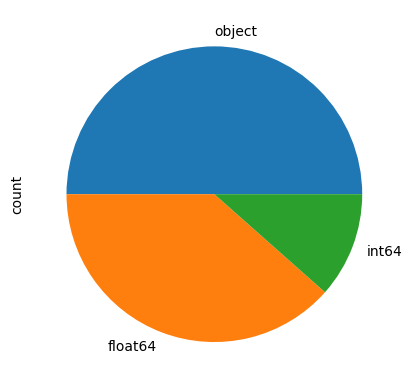

In [314]:
df_1314.dtypes.value_counts().plot.pie() #plot du nombre de variables par types (categorielles et quantitatives)

In [315]:
(df_1314.isna().sum()/df_1314.shape[0]).sort_values(ascending=True) # analyse des valeurs manquantes

Marque                                  0.000000
masseVideEuroMax_kg                     0.000000
masseVideEuroMin_kg                     0.000000
Carrosserie                             0.000000
BoîteDeVitesse                          0.000000
PuissanceAdministrative                 0.000000
Hybride                                 0.000000
gamme                                   0.000000
TVV                                     0.000000
CNIT                                    0.000000
DésignationCommerciale                  0.000000
Carburant                               0.000000
ModèleDossier                           0.000000
ModèleUTAC                              0.000000
CO2_g_par_km                            0.000731
PuissanceMaximale_kW                    0.001932
Champ_V9                                0.002963
Particules_g_par_km                     0.399544
ConsommationMixte_l_par_100km           0.486386
ConsommationUrbaine_l_par_100km         0.490140
ConsommationExtraUrb

<Axes: >

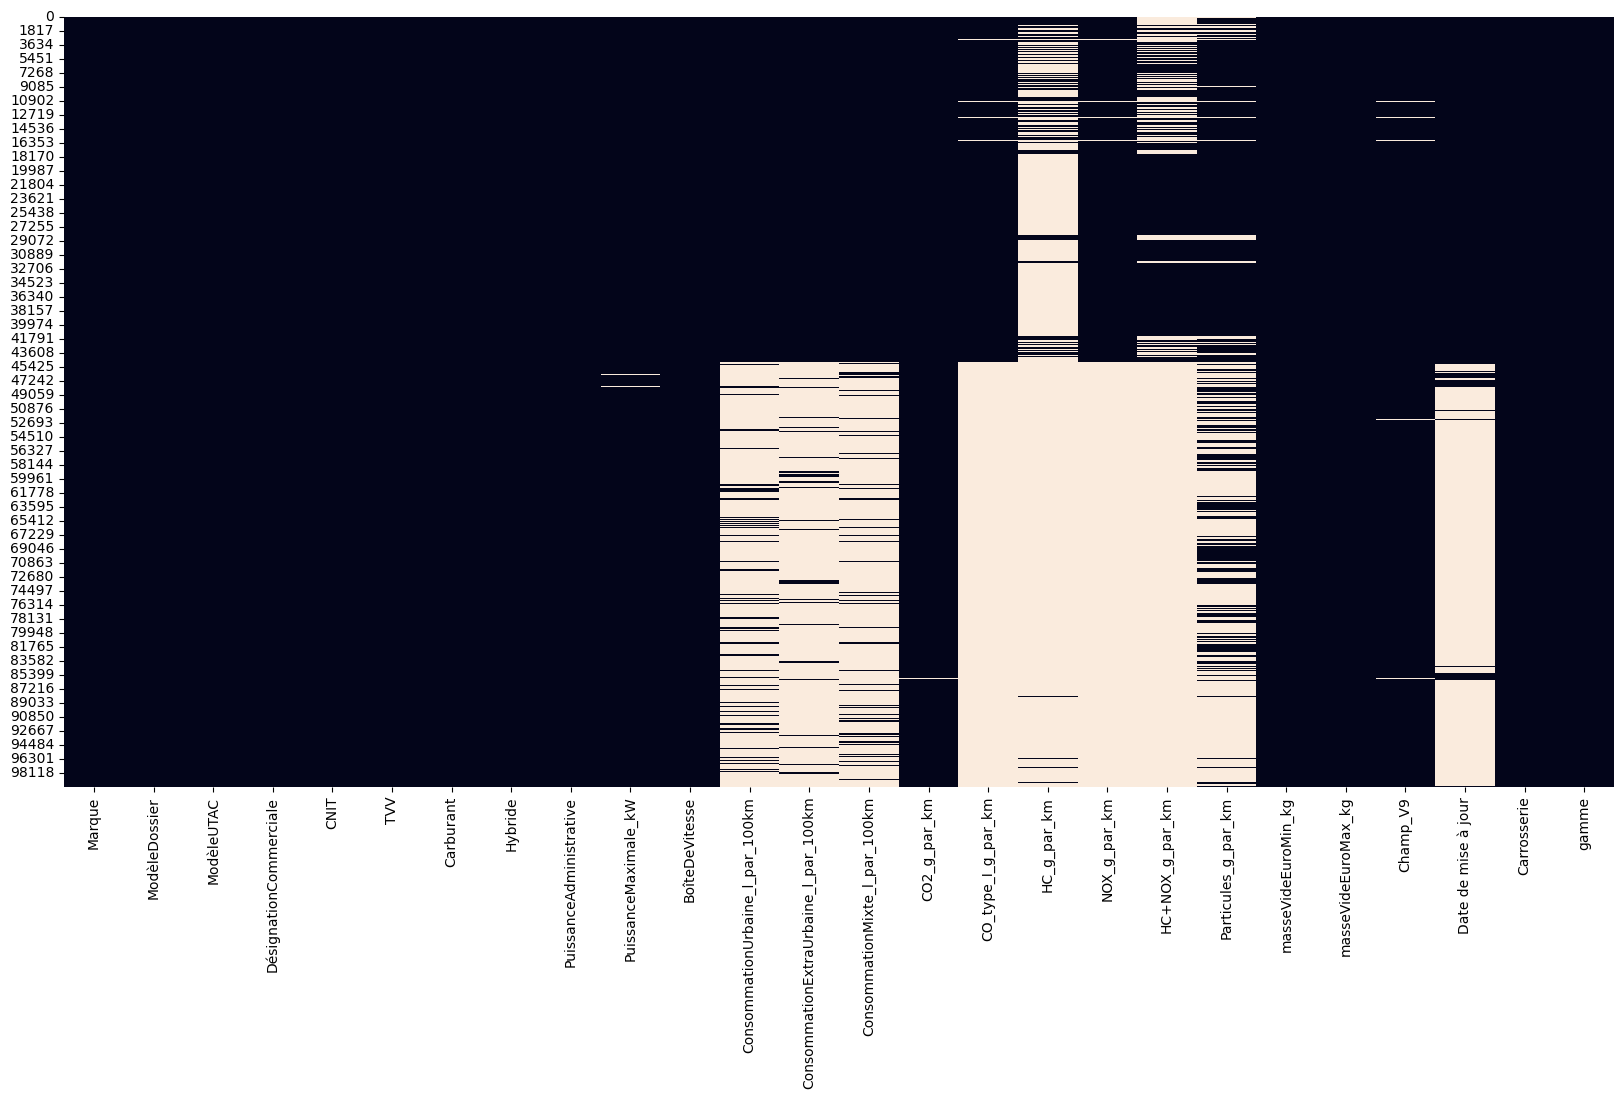

In [316]:
plt.figure(figsize=(20,10)) # Mapping du dataset pour bien mettre en évidence les valeurs manquantes
sns.heatmap(df_1314.isna(), cbar=False)

In [317]:
df_1314.index.is_unique # on vérifie si les doublons d'index des lignes

True

In [318]:
df_1314.columns.is_unique # on fait pareil pour les colonnes

True

In [319]:
print(df_1314.duplicated().sum()) # Nous avons ici 626 lignes en doubon

626


In [320]:
df_1314 = df_1314.drop_duplicates() # Suppression des doublons dans le dataset df_1314

In [321]:
print(df_1314.duplicated().sum()) # Vérification des doublons dans le dataset. tous les doublons ont été supprimés

0


### 3.2 Analyse de fond du DataSet df_1314

#### 3.2.1 Nombres de categories par variables categorielles


#####  Quand il s'agira d'embarquer le dataset dans un modèle, il sera imperatif d'encoder toutes les variables categorielles en utilisant la methode OneHotEncoding. Cette methode appliquée à des variables categorielles à plusieurs categories necessitera de manipuler des matrices de grandes dimensions pour chaque variables (5367 colonnes pour la variable DésignationCommerciale, 64337 colonnes pour la variables CNIT, 39994 colonnes pour la variables TVV, 450 colonnes pour la variables ModèleUTAC et 511 colonnes pour la variable ModèleDossier). Nous supprimerons les variables categorielles "Date de mise à jour" et "Champ_V9" qui n'apporteront rien comme information dans l'analyse. 


##### Dans ces conditions, deux solutions s'offre à nous. La première est de supprimer ces variables à grande dimenssions dans le dataset pour faciliter l'analyse et la manipulation des données. La deuxième, c'est de faire une reduction de dimensionnalité qui ne sera pas simple sur un tel DataSet. Nous avons donc opter pour la suppression de ces variables avant de les embarquer dans nos modèles(La suppression de ces variables se fera un peu plus loin dans l'analyse).

In [324]:
# Identification du nombre de categorie par variable (Servira à remplir le fichier excel)
for col in df_1314.select_dtypes('object'):
    print(f'{col :-<100} {pd.DataFrame(df_1314[col].unique()).value_counts().sum()}')

Marque---------------------------------------------------------------------------------------------- 53
ModèleDossier--------------------------------------------------------------------------------------- 511
ModèleUTAC------------------------------------------------------------------------------------------ 450
DésignationCommerciale------------------------------------------------------------------------------ 5367
CNIT------------------------------------------------------------------------------------------------ 64337
TVV------------------------------------------------------------------------------------------------- 39994
Carburant------------------------------------------------------------------------------------------- 13
Hybride--------------------------------------------------------------------------------------------- 2
BoîteDeVitesse-------------------------------------------------------------------------------------- 19
Champ_V9-----------------------------------------------

In [325]:
for col in df_1314.select_dtypes('object'): # énumeration des categories des variables dont les categorie sont inferieur ou égale à 10 (fichier excel)
    if (pd.DataFrame(df_1314[col].unique()).value_counts().sum())<=20 :
        print(f'{col :-<100} {df_1314[col].unique()}')

Carburant------------------------------------------------------------------------------------------- ['ES' 'GO' 'EH' 'EE' 'EL' 'GH' 'ES/GP' 'GP/ES' 'ES/GN' 'GN/ES' 'FE' 'GN'
 'GL']
Hybride--------------------------------------------------------------------------------------------- ['non' 'oui']
BoîteDeVitesse-------------------------------------------------------------------------------------- ['M 6' 'D 6' 'M 5' 'V 0' 'A 6' 'A 7' 'A 8' 'A 4' 'A 5' 'D 7' 'D 5' 'A 0'
 'S 6' 'N 0' 'M 7' 'N 1' 'A 1' 'A 9' 'V .']
Date de mise à jour--------------------------------------------------------------------------------- ['juin-13' 'mars-13' 'déc-12' 'mars-14' nan 'dÚc-13' 'sept-13']
Carrosserie----------------------------------------------------------------------------------------- ['BREAK' 'BERLINE' 'CABRIOLET' 'COUPE' 'TS TERRAINS/CHEMINS' 'COMBISPACE'
 'MONOSPACE' 'MINISPACE' 'MONOSPACE COMPACT' 'MINIBUS' 'COMBISPCACE']
gamme-----------------------------------------------------------------------

#### 3.2.2 Données statistiques par variable quantitative

##### Nous utilisons la methode describe() pour décrire les données quantitatives à travers des mesures statistiques de position (Moyenne, maximum, minimum, quantiles) et de dispersion(ecart-type). C'est important car ces données nous aiderons à prendre des décision par exemple quand il s'agira de remplacer les NaN.

##### En terme metier, le CO2 est produit par combustion dans les moteurs à combustion interne. Le CO2 est donc un produit de combustion tout comme les composées CO, HC, NOX et particules. Ces composées ne contribuent donc pas à la production du CO2, et comme dans ce projet il s'agit de prédire l'emission de CO2, les variables CO_type_I_g_par_km, HC_g_par_km, NOX_g_par_km, HC+NOX_g_par_km et Particules_g_par_km ne seront pas pris en compte dans la modelisation. Elle seront supprimées un peu plus loin dans la suite du projet.

In [327]:
# Servira à remplir le fichier excel
for col in df_1314.select_dtypes('float64'):
    print(col, df_1314[col].describe())

PuissanceMaximale_kW count    99075.000000
mean       121.701685
std         46.973857
min         10.000000
25%        100.000000
50%        120.000000
75%        120.000000
max        585.000000
Name: PuissanceMaximale_kW, dtype: float64
ConsommationUrbaine_l_par_100km count    50313.000000
mean         9.631825
std          2.264316
min          0.000000
25%          8.800000
50%          9.700000
75%         10.300000
max         41.100000
Name: ConsommationUrbaine_l_par_100km, dtype: float64
ConsommationExtraUrbaine_l_par_100km count    48734.000000
mean         6.594344
std          1.163919
min          2.800000
25%          6.400000
50%          6.700000
75%          7.000000
max         14.900000
Name: ConsommationExtraUrbaine_l_par_100km, dtype: float64
ConsommationMixte_l_par_100km count    50687.000000
mean         7.727290
std          1.507312
min          1.200000
25%          7.200000
50%          8.000000
75%          8.200000
max         24.500000
Name: ConsommationMi

In [328]:
# Servira à remplir le fichier excel
for col in df_1314.select_dtypes('int'):
    print(col, df_1314[col].describe())

PuissanceAdministrative count    99268.000000
mean        10.781934
std          5.333598
min          1.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         81.000000
Name: PuissanceAdministrative, dtype: float64
masseVideEuroMin_kg count    99268.000000
mean      2090.734204
std        313.607218
min        825.000000
25%       1976.000000
50%       2076.000000
75%       2246.000000
max       3115.000000
Name: masseVideEuroMin_kg, dtype: float64
masseVideEuroMax_kg count    99268.000000
mean      2267.104706
std        422.750915
min        825.000000
25%       2075.000000
50%       2200.000000
75%       2600.000000
max       3115.000000
Name: masseVideEuroMax_kg, dtype: float64


#### 3.2.3 Visualisation et discretisation de la variable cible


##### Le C02 est la variable cible à prédire dans ce projet. Il s'agit d'une variable quantitative car elle prend des valeurs continues de types float. Il s'agit donc ici d'un problème de regression. Le CO2 peux être discrétisé selon étiquette énergie permettant de lutter contre le rechauffement climatique (https://www.ornikar.com/code/cours/ecologie/ecoresponsabilite/etiquette-energetique) mis en place pour classifier les voitures pas rapport à leur émission en CO2. Ces classes vont de A à G. Il est donc possible d'utiliser des modèles de classifications pour classifier les véhicules du datsset en fonction de ces classes (A, B, C, D, E, F et G). Une nouvelle variable "Class_CO2" contenant ces valeurs (A, B, C, D, E, F et G) a été créée et ajoutée au DataSet qui passe de 26 colonnes à 27 colonnes. 

##### La disdribution du CO2 balaie une large gamme de valeurs (de 27 g/km à 572g/km) avec une mediane proche des 203 g/km et 3 picks observable sur le graphe. On peut également observer plusieurs valeurs aberantes au niveau inferieur et superieur de la box.  

##### 3.2.3.1 Visualisation

C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\976253941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1314["CO2_g_par_km"])
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CO2_g_par_km', ylabel='Density'>

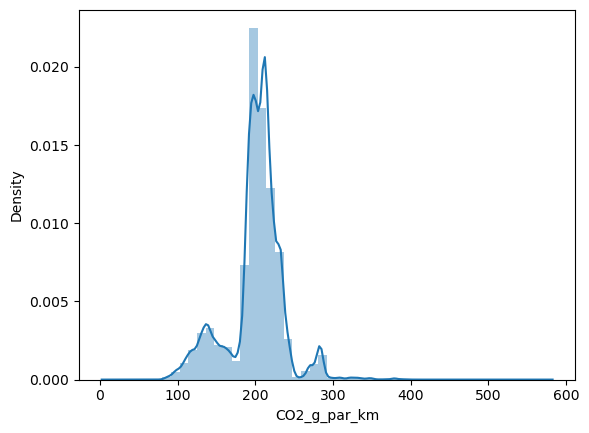

In [331]:
sns.distplot(df_1314["CO2_g_par_km"])

<Axes: >

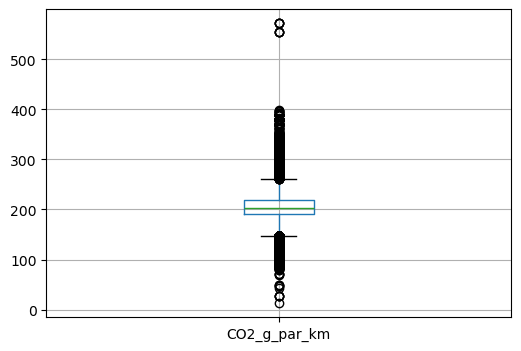

In [332]:
df_1314.boxplot(column= 'CO2_g_par_km', figsize= (6,4))

##### 3.2.3.2 Discretisation

In [334]:
# Discretisation de la variable "CO2_g_par_km" en classe et création de la variable Class_CO2

Norme_CO2 = pd.cut(x=df_1314['CO2_g_par_km'],
                 bins= [min(df_2013['CO2_g_par_km']), 100, 120, 140, 160, 200, 250, max(df_2013['CO2_g_par_km'])],
                 labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']) # Decoupage de la variable "CO2 (g/km)" en catégorie
df_1314['Class_CO2'] = Norme_CO2 # création de la nouvelle colonne Class_CO2

In [335]:
df_1314['Class_CO2'].unique()

['E', 'C', 'D', 'G', 'B', 'A', 'F', NaN]
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']

In [336]:
df_1314.head() # presence de 

Marque ModèleDossier ModèleUTAC    DésignationCommerciale  \
0  ALFA-ROMEO           159        159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO           159        159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO           159        159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO           159        159      159 2.0 JTDm (170ch)   

              CNIT          TVV Carburant Hybride  PuissanceAdministrative  \
0  M10ALFVP000G340  939AXN1B52C        ES     non                       12   
1  M10ALFVP000U221  939AXP1B54C        GO     non                        9   
2  M10ALFVP000E302   939AXR1B64        GO     non                        7   
3  M10ALFVP000F303  939AXR1B64B        GO     non                        7   
4  M10ALFVP000G304   939AXS1B66        GO     non                        9   

   PuissanceMaximale_kW BoîteDeVitesse  ConsommationUrbaine_l_par_100km  \
0                 147.0            M 6                             11.3   
1                 125.0            M 6                              6.6   
2                 100.0            M 6                              6.6   
3                 100.0            M 6                              6.6   
4                 125.0            M 6                              6.9   

   ConsommationExtraUrbaine_l_par_100km  ConsommationMixte_l_par_100km  \
0                                   5.8                            7.8   
1                                   4.3                            5.1   
2                                   4.2                            5.1   
3                                   4.2                            5.1   
4                                   4.3                            5.3   

   CO2_g_par_km  CO_type_I_g_par_km  HC_g_par_km  NOX_g_par_km  \
0         182.0               0.647        0.052         0.032   
1         136.0               0.192          NaN         0.169   
2         134.0               0.066          NaN         0.149   
3         134.0               0.066          NaN         0.149   
4         139.0               0.060          NaN         0.164   

   HC+NOX_g_par_km  Particules_g_par_km  masseVideEuroMin_kg  \
0              NaN                0.002                 1505   
1            0.190                0.003                 1565   
2            0.175                0.001                 1565   
3            0.175                0.001                 1565   
4            0.193                0.001                 1565   

   masseVideEuroMax_kg                Champ_V9 Date de mise à jour  \
0                 1505  715/2007*692/2008EURO5             juin-13   
1                 1565  715/2007*692/2008EURO5             juin-13   
2                 1565  715/2007*692/2008EURO5             juin-13   
3                 1565  715/2007*692/2008EURO5             juin-13   
4                 1565  715/2007*692/2008EURO5             juin-13   

  Carrosserie      gamme Class_CO2  
0       BREAK  MOY-SUPER         E  
1     BERLINE  MOY-SUPER         C  
2     BERLINE  MOY-SUPER         C  
3     BERLINE  MOY-SUPER         C  
4     BERLINE  MOY-SUPER         C

#### 3.2.4 Visualisation des variables quantitatives

C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\792194175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1314[col])
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\792194175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

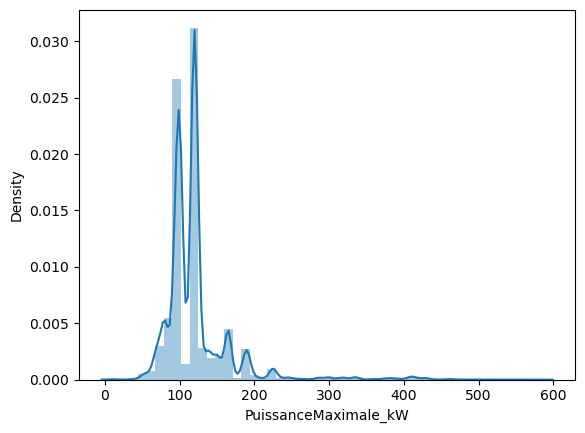

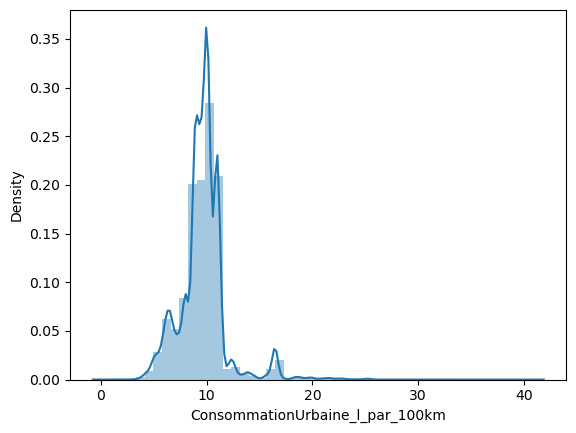

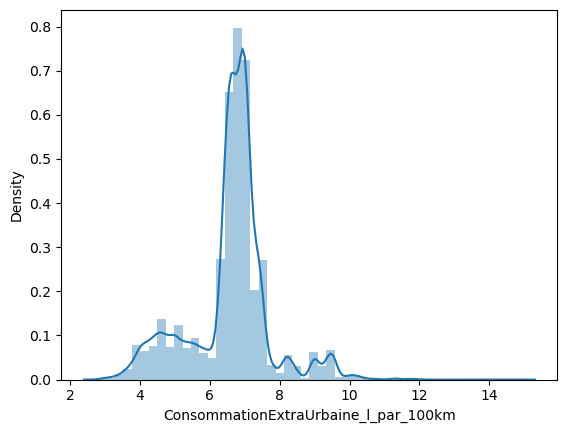

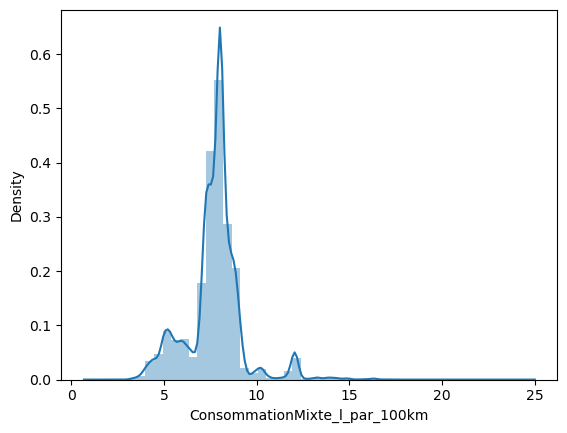

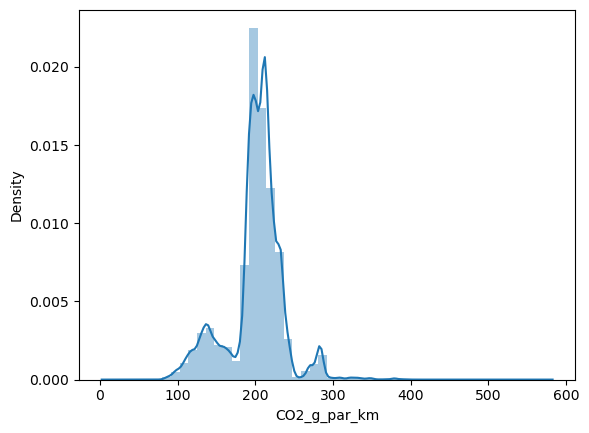

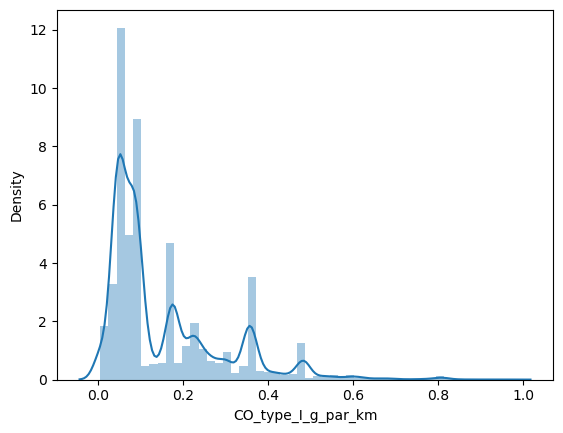

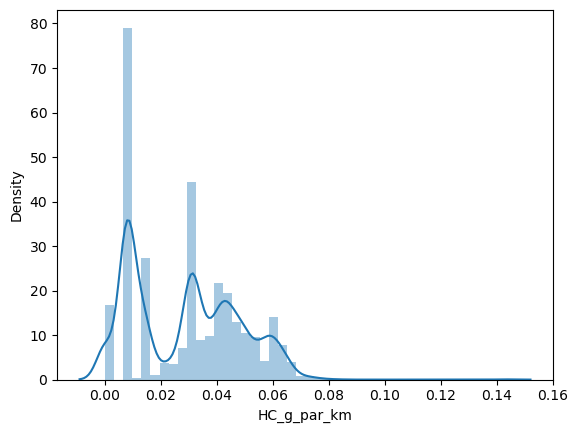

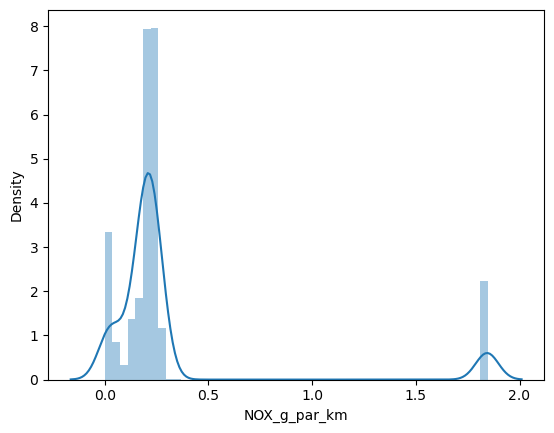

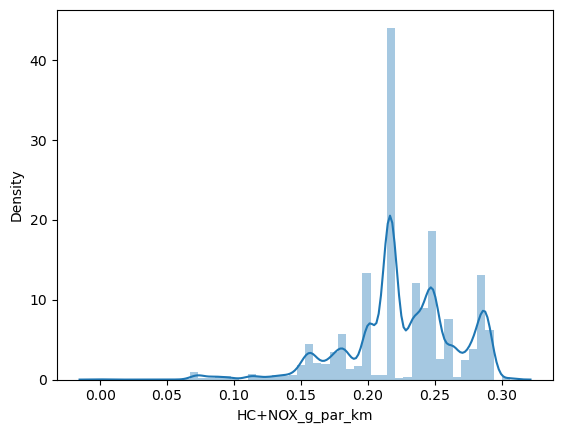

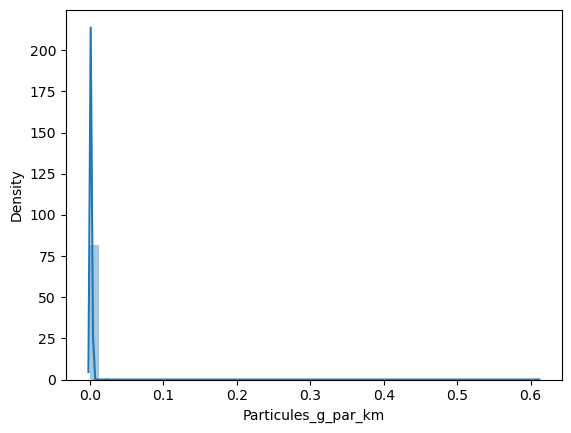

In [339]:
for col in df_1314.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_1314[col])

##### 3.2.4.2 Visualisation des variables quantitatives de type int


##### De même que les courbes de type float, les distributions des variables de type int ne sont pas centrées en zéro et ont des ecart-types différents de 1. Cela signifie que nos données de types int n'ont pas été standardisées. Au niveau des variables masseVideEuroMax_kg et masseVideEuroMin_kg , il n'est pas pertinent de garder la masse vide du véhicule. Car Il représente la masse du véhicule en sortie d’usine. Il s’agit du poids à vide du véhicule sans rien dedans. En plus les deux variables semblent avoir le même comportement. Nous conservons la variables masseVideEuroMax_kg et laissons la variables masseVideEuroMin_kg pour éviter les problèmes de muticollinéarité. La variables "PuissanceAdministrative" est a traiter comme la variables "PuissanceMaximale_kW" (car comportement similaire que la variable cible). Elle sera également supprimées pour éviter les problèmes de colinéarité.

C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\1235968580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1314[col])
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\1235968580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility

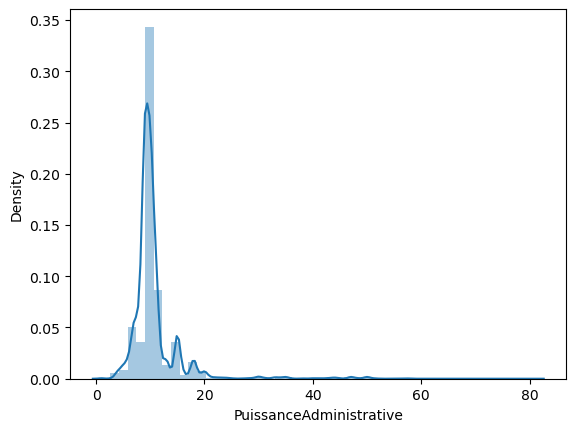

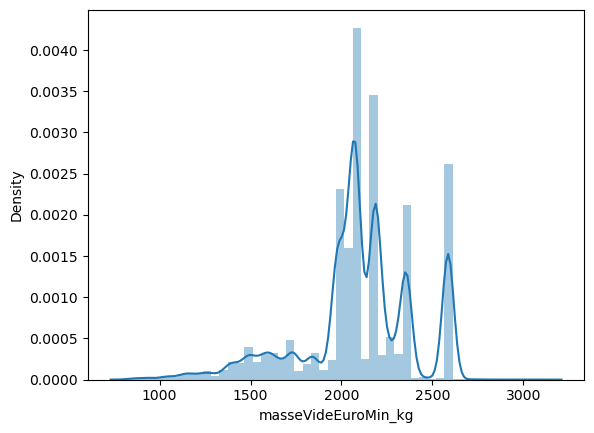

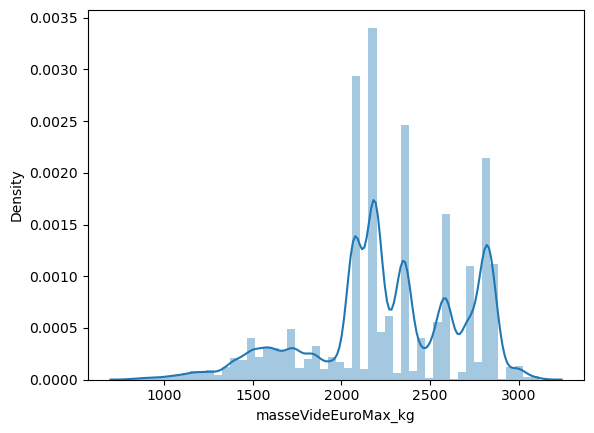

In [341]:
for col in df_1314.select_dtypes('int'):
    plt.figure()
    sns.distplot(df_1314[col])

##### 3.2.4.3 Analyse des valeurs extrêmes des variables quantitatives retenues

##### La courbe de distribution de la puissance max est distribuée sur une plage de 10 à 585 (en utilisant la methode describe()). la visualisation de cette distribution avec le box plot nous montre plusieurs valeurs aberantes au niveau supérieur. Le calcul des seuils max donne la valeur 150 (ce qui signifie que toutes les valeurs superieures à cette valeur sont des valeurs extrêmes superieures.Par contre, sur la distribution de la varable, on constate que la densité tend vers 0 à partir de 500. Nous supprimons ces données car elles s'écartent également des trois pick observés sur la distribution du CO2.

##### La courbe de distribution de la masseVideEuroMax_kg est distribuée sur une plage de 825 à 585 (en utilisant la methode describ()). La visualisation de cette distribution avec le box plot nous montre quelques valeurs aberantes au niveau inférieur. Vu le nombre d'observation que nous avons dans la données, nous pensons que ces valeurs n'auront pas d'influence notables. 

<Axes: >

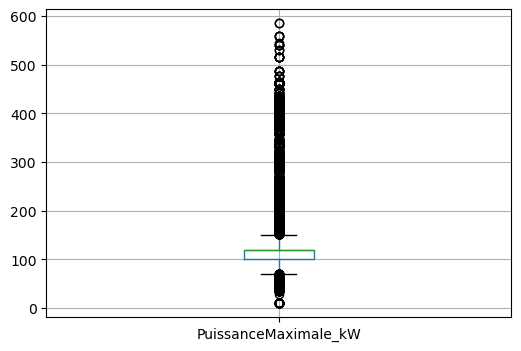

In [343]:
df_1314.boxplot(column= 'PuissanceMaximale_kW', figsize= (6,4))

In [344]:
# seuil max 𝑄3+1.5∗(𝑄3−𝑄1)
df_quant_075Pmax = df_1314["PuissanceMaximale_kW"].quantile(q=0.75)
df_quant_025PMax = df_1314["PuissanceMaximale_kW"].quantile(q=0.25)
#print(f"le quantile Q1 est : {df_quant_075}")

SeuilPMax = df_quant_075Pmax + 1.5*(df_quant_075Pmax - df_quant_025PMax)
print(f"Valeur extrême max est: {SeuilPMax}")
# seuil min 𝑄1−1.5∗(𝑄3−𝑄1)
SeuilPMin = df_quant_025PMax - 1.5*(df_quant_075Pmax - df_quant_025PMax)
print(f"Valeur extrême min est: {SeuilPMin}")

Valeur extrême max est: 150.0
Valeur extrême min est: 70.0


<Axes: >

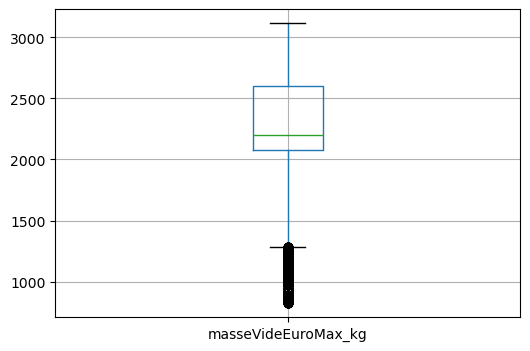

In [345]:
df_1314.boxplot(column= 'masseVideEuroMax_kg', figsize= (6,4))

In [346]:
# seuil max 𝑄3+1.5∗(𝑄3−𝑄1)
df_quant_075MMax = df_1314["masseVideEuroMax_kg"].quantile(q=0.75)
df_quant_025MMax = df_1314["masseVideEuroMax_kg"].quantile(q=0.25)
#print(f"le quantile Q1 est : {df_quant_075}")

SeuilMMax = df_quant_075MMax + 1.5*(df_quant_075MMax - df_quant_025MMax)
print(f"Valeur extrême max est: {SeuilMMax}")
# seuil min 𝑄1−1.5∗(𝑄3−𝑄1)
SeuilMMMin = df_quant_025MMax - 1.5*(df_quant_075MMax - df_quant_025MMax)
print(f"Valeur extrême min est: {SeuilMMMin}")

Valeur extrême max est: 3387.5
Valeur extrême min est: 1287.5


#### 3.2.5 Visualisation des variables Categorielles ayant des categories <=53

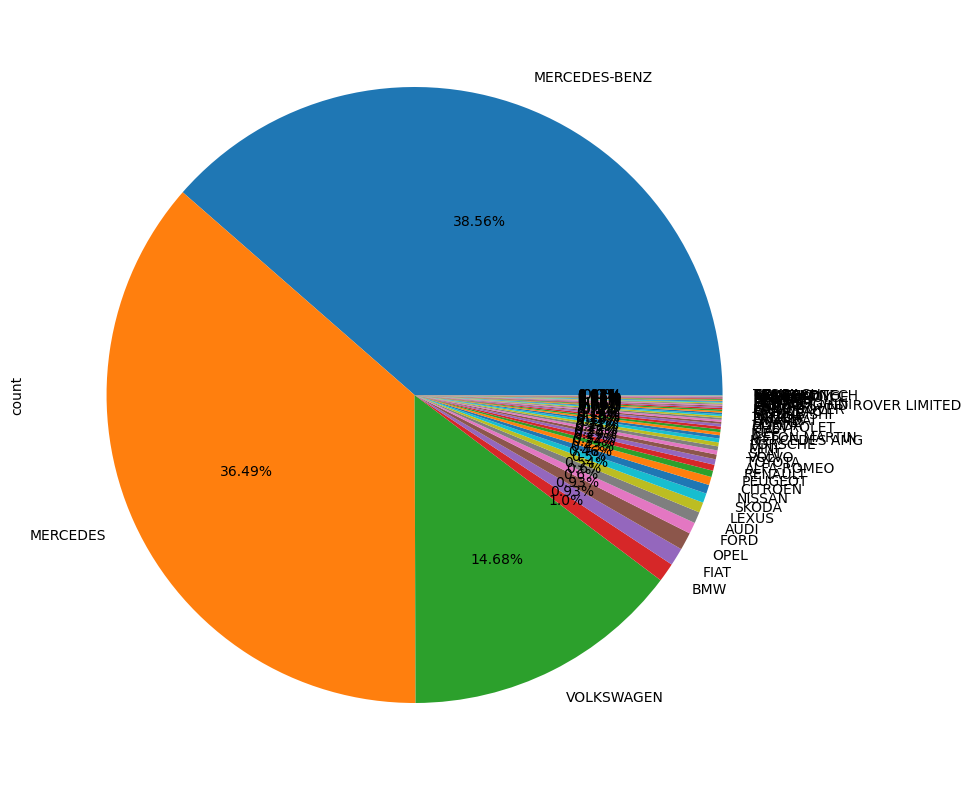

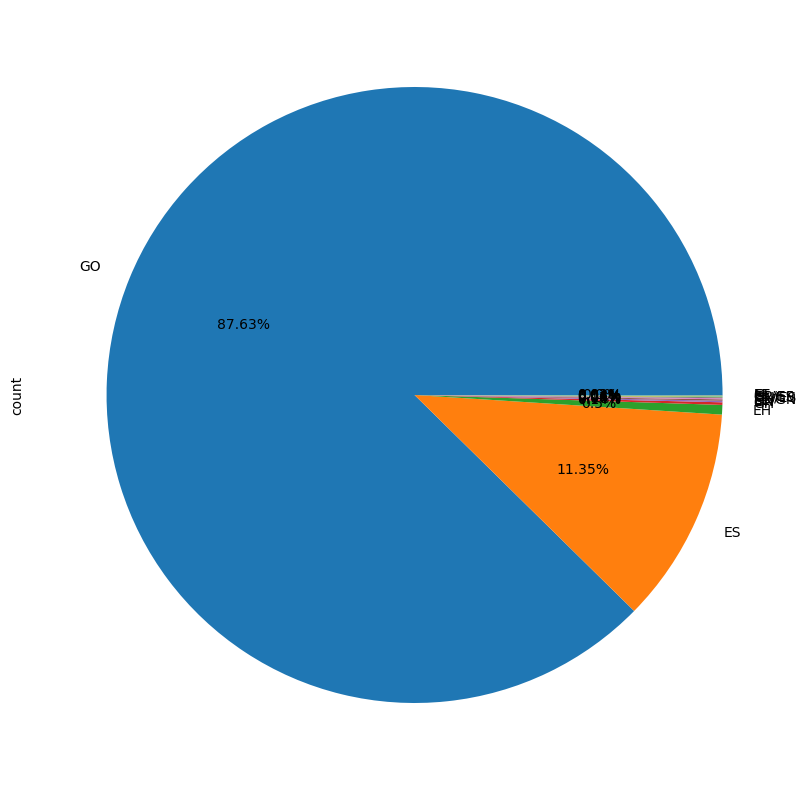

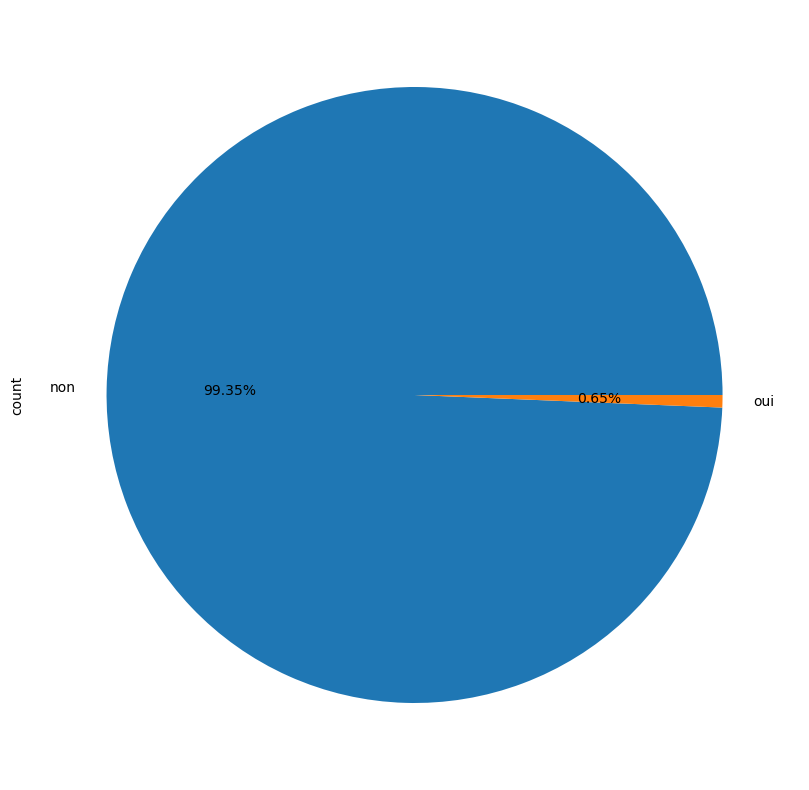

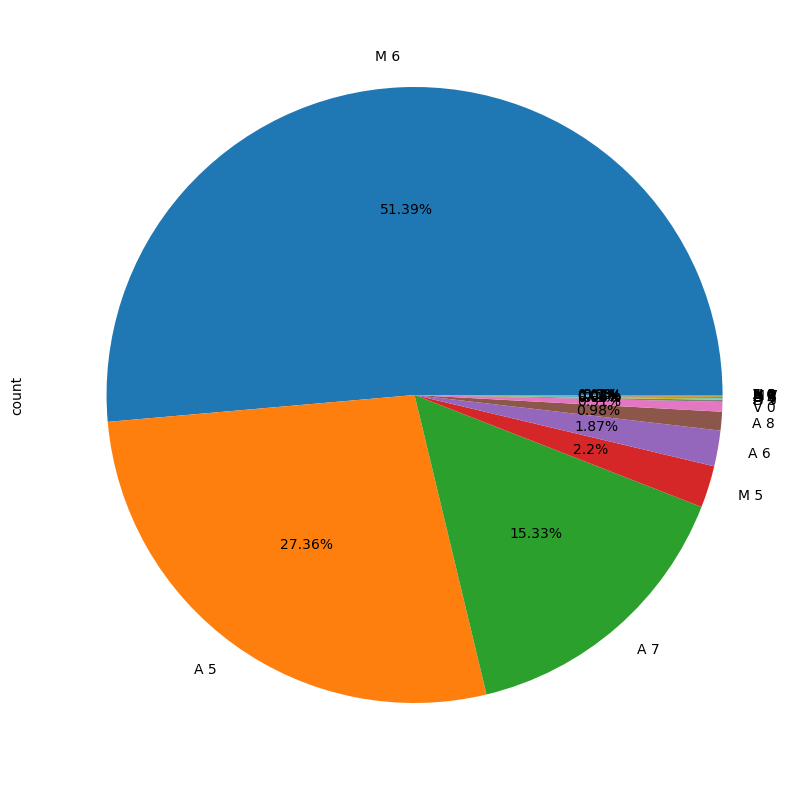

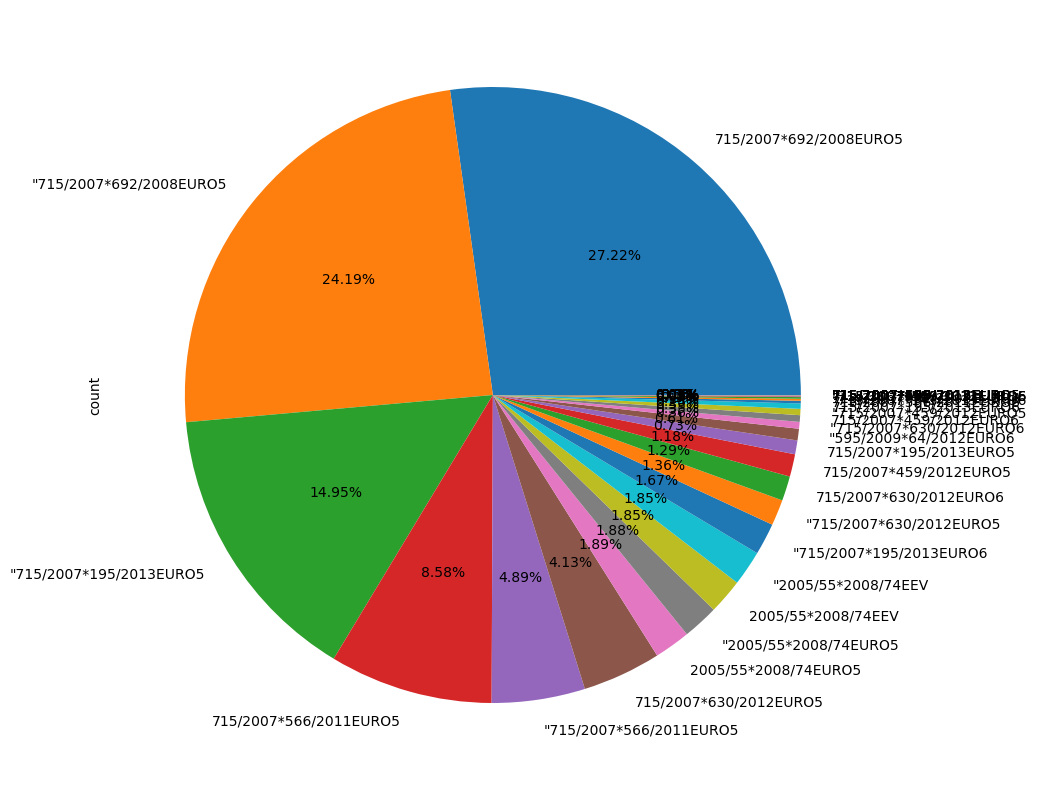

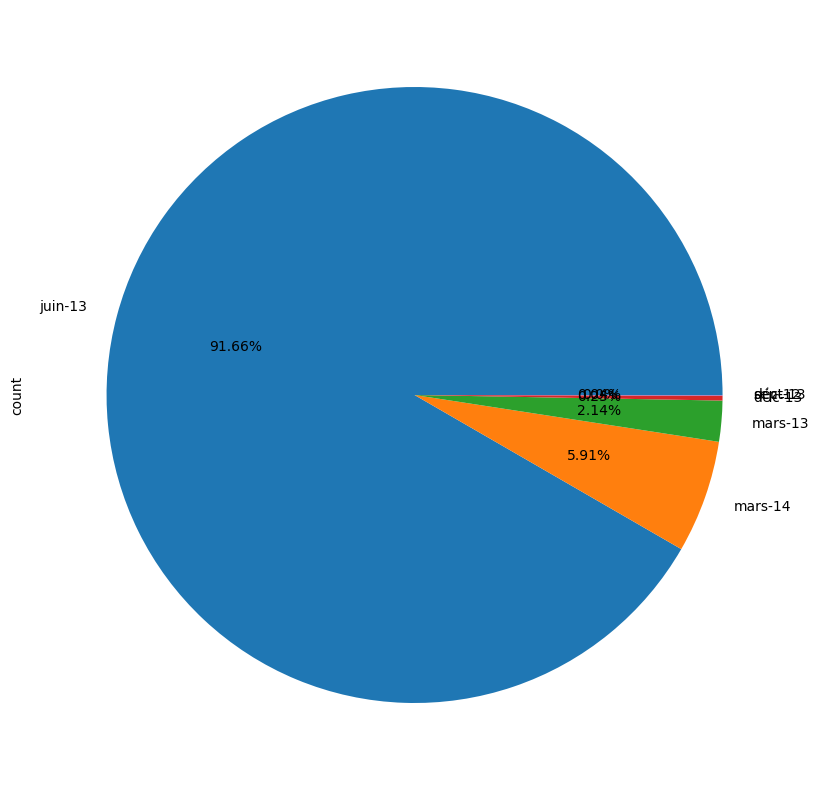

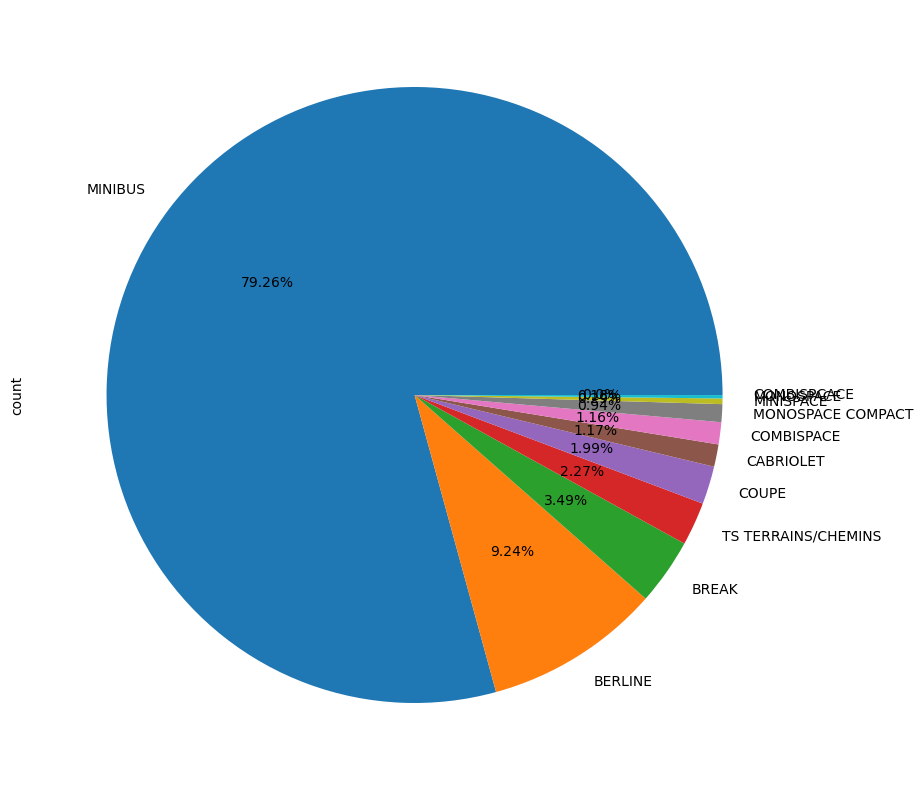

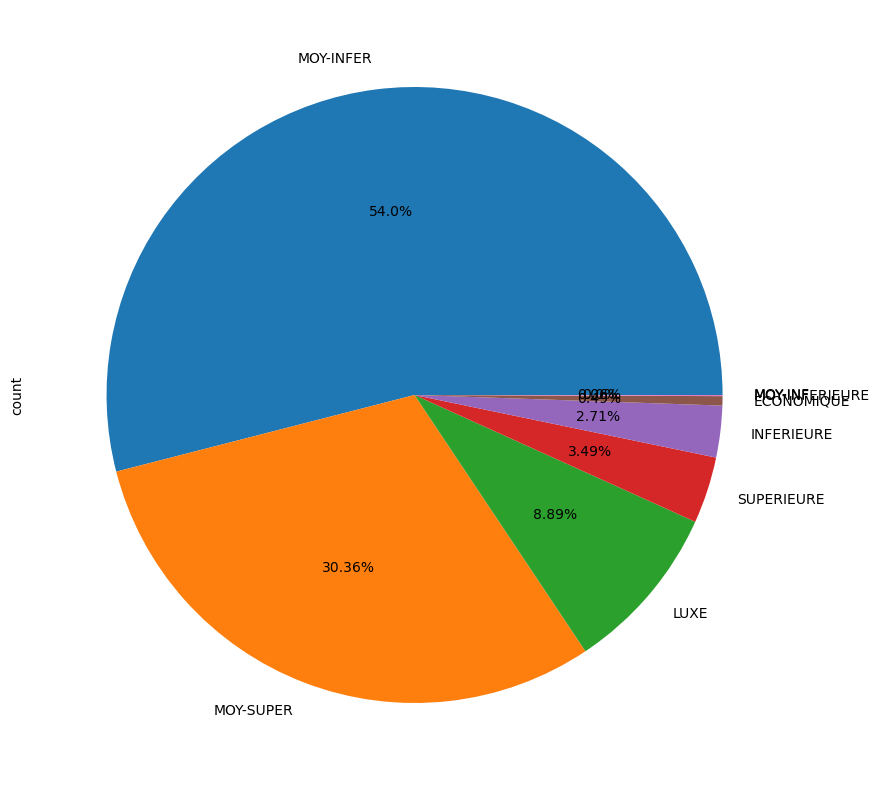

In [348]:
for col in df_1314.select_dtypes('object'): 
    if (pd.DataFrame(df_1314[col].unique()).value_counts().sum())<=53 :
        plt.figure(figsize=(10,10))
        df_1314[col].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%') 

##### 3.2.5.1 Analyse des categories par variable - "Variable gamme"



##### la categorie 'MOY-INFER' est plus représentée dans la variables gamme. Elle est suivie par les categories 'MOY-SUPER' (30%), 'LUXE' (9%),.... les categories 'MOY-INFER', 'MOY-INF' et 'MOY-INFERIEURE' semblent pareilles? cela peut être dû à une erreur d'écriture. Dans la suite du projet nous supposerons que : 'MOY-INFER' = 'MOY-INF' = 'MOY-INFERIEURE'. Après la prise en compte de cette supposition, les categories de la variables "gamme" passent de 8 à 6 comme constaté respectivement sur les figures ci-dessous.

In [350]:
df_1314['gamme'].unique()

array(['MOY-SUPER', 'LUXE', 'MOY-INFER', 'INFERIEURE', 'SUPERIEURE',
       'ECONOMIQUE', 'MOY-INF', 'MOY-INFERIEURE'], dtype=object)

<Axes: xlabel='gamme', ylabel='count'>

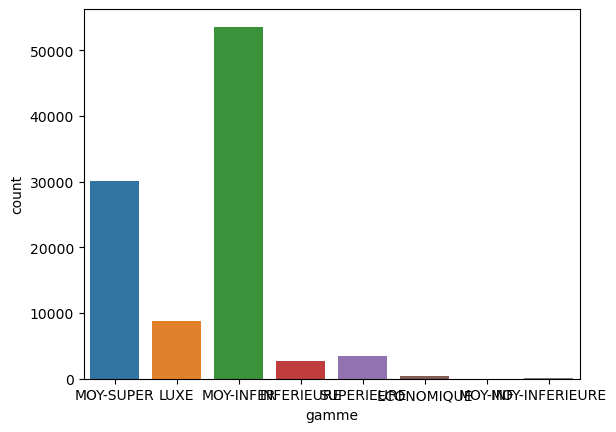

In [351]:
sns.countplot(x = "gamme", data = df_1314)

In [352]:
dico_gamme = {'MOY-INFER' : 'MOY-INF',
              'MOY-INFERIEURE' : 'MOY-INF',
              'MOY-SUPER':'MOY-SUPER',
              'INFERIEURE':'INFERIEURE',
              'SUPERIEURE':'SUPERIEURE',
              'LUXE':'LUXE',
              'ECONOMIQUE':'ECONOMIQUE',
              'MOY-INF':'MOY-INF'}
df_1314['gamme'] = df_1314['gamme'].map(dico_gamme) # Mise en place d'un dictionnaire et utilisation de la methode map pour ajuster les catégories
df_1314['gamme'].unique()

array(['MOY-SUPER', 'LUXE', 'MOY-INF', 'INFERIEURE', 'SUPERIEURE',
       'ECONOMIQUE'], dtype=object)

<Axes: xlabel='gamme', ylabel='count'>

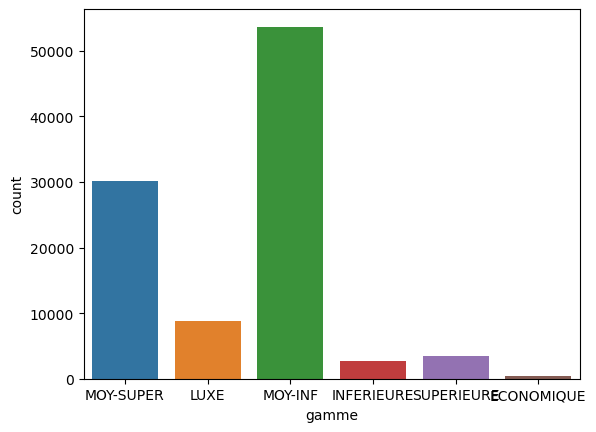

In [353]:
sns.countplot(x = "gamme", data = df_1314)

##### 3.2.5.2 Analyse des categories par variable - "Variable Carrosserie"



##### la categorie 'MINIBUS'(79,7%) est plus représentée dans la variables Carrosserie. Elle est suivie par les categorie 'BERLINE' (9,19%), 'BREAK' (3,45%),....Il semble qu'il ait une erreur d'orthographe sur les categories 'COMBISPACE' et 'COMBISPCACE'. Nous ajusterons ces deux categories dans la suite pour considerer que :"COMBISPACE" = "COMBISPCACE". Après la prise en compte de cette supposition, les categories de la variables "Carrosserie" passent de 11 à 10 comme constaté respectivement sur les figures ci-dessous.

In [355]:
df_1314['Carrosserie'].unique()

array(['BREAK', 'BERLINE', 'CABRIOLET', 'COUPE', 'TS TERRAINS/CHEMINS',
       'COMBISPACE', 'MONOSPACE', 'MINISPACE', 'MONOSPACE COMPACT',
       'MINIBUS', 'COMBISPCACE'], dtype=object)

<Axes: xlabel='Carrosserie', ylabel='count'>

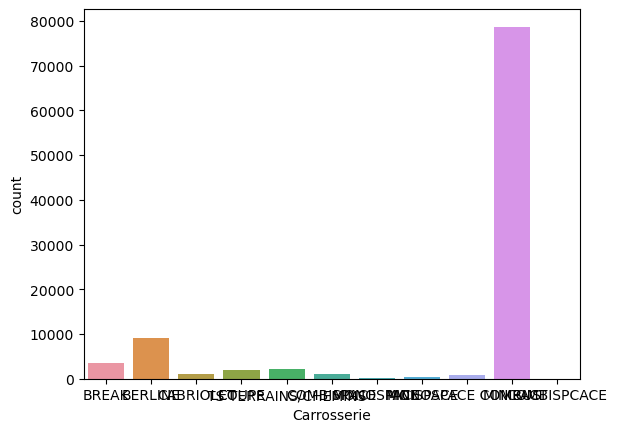

In [356]:
sns.countplot(x = "Carrosserie", data = df_1314)

In [357]:
dico_Carrosserie = {'BREAK' : 'BREAK',
              'BERLINE' : 'BERLINE',
              'COUPE':'COUPE',
              'CABRIOLET':'CABRIOLET',
              'TS TERRAINS/CHEMINS':'TS TERRAINS/CHEMINS',
              'COMBISPACE':'COMBISPACE',
              'MONOSPACE':'MONOSPACE',
              'MINISPACE':'MINISPACE',
              'MONOSPACE COMPACT':'MONOSPACE COMPACT',
              'MINIBUS':'MINIBUS',
              'COMBISPCACE':'COMBISPACE'}
df_1314['Carrosserie'] = df_1314['Carrosserie'].map(dico_Carrosserie) # Mise en place d'un dictionnaire et utilisation de la methode map pour ajuster les catégories
df_1314['Carrosserie'].unique()

array(['BREAK', 'BERLINE', 'CABRIOLET', 'COUPE', 'TS TERRAINS/CHEMINS',
       'COMBISPACE', 'MONOSPACE', 'MINISPACE', 'MONOSPACE COMPACT',
       'MINIBUS'], dtype=object)

<Axes: xlabel='Carrosserie', ylabel='count'>

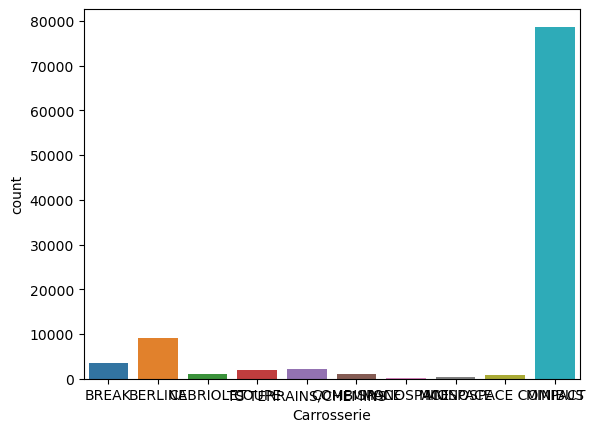

In [358]:
sns.countplot(x = "Carrosserie", data = df_1314)

##### 3.2.5.3 Analyse des categories par variable - "BoîteDeVitesse"


##### La categorie 'M6'(51%) est plus représentée dans la variables BoîteDeVitesse. Elle est suivie par les categorie 'A5' (27%), 'A7' (15%),...les boites de vitesses : M 6', 'M 5', 'A 7', 'A 6', 'A 8', 'A 5' à elles seules representent 99,15%. L’analyse de la variable BoîteDeVitesse met en avant que l’information principale conserve le type de boite de vitesse (Manuelle ‘M’ ou Automatique ‘A’ ou autre). Nous allons donc retravailler cette variable en converissant les catégories en trois : M : pour les catégories commençant par M, A :  pour les catégories commençant par A et BV_Autres : pour les catégories commençant par une autre lettre. Après la prise en compte de ces consideration, les categories de la variables "BoîteDeVitesse" passent de 19 à 3 comme constaté respectivement sur les figures ci-dessous

In [360]:
df_1314['BoîteDeVitesse'].unique()

array(['M 6', 'D 6', 'M 5', 'V 0', 'A 6', 'A 7', 'A 8', 'A 4', 'A 5',
       'D 7', 'D 5', 'A 0', 'S 6', 'N 0', 'M 7', 'N 1', 'A 1', 'A 9',
       'V .'], dtype=object)

<Axes: xlabel='BoîteDeVitesse', ylabel='count'>

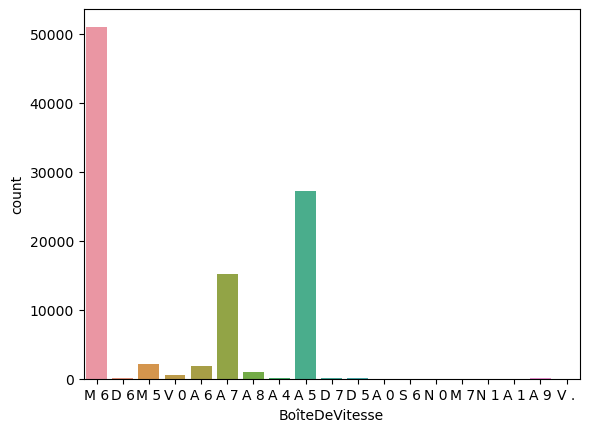

In [361]:
sns.countplot(x = "BoîteDeVitesse", data = df_1314)

In [362]:
dico_BoîteDeVitesse = {'M 6':'M',
                    'M 5' : 'M',
                    'M 7':'M',
                    'D 6':'Auto',
                    'D 7':'Auto',
                    'D 5':'Auto',
                    'N 0':'Auto',
                    'N 1':'Auto',
                    'S 6':'Auto',
                    'V 0':'BV_autre',
                    'A 6':'BV_autre',
                    'A 7':'BV_autre',
                    'A 8':'BV_autre',
                    'A 4':'BV_autre',
                    'A 5':'BV_autre',
                    'A 0':'BV_autre',
                    'A 1':'BV_autre',
                    'A 9':'BV_autre',
                    'V .':'BV_autre',
                     }
df_1314['BoîteDeVitesse'] = df_1314['BoîteDeVitesse'].map(dico_BoîteDeVitesse) # Mise en place d'un dictionnaire et utilisation de la methode map pour ajuster les catégories
df_1314['BoîteDeVitesse'].unique()

array(['M', 'Auto', 'BV_autre'], dtype=object)

<Axes: xlabel='BoîteDeVitesse', ylabel='count'>

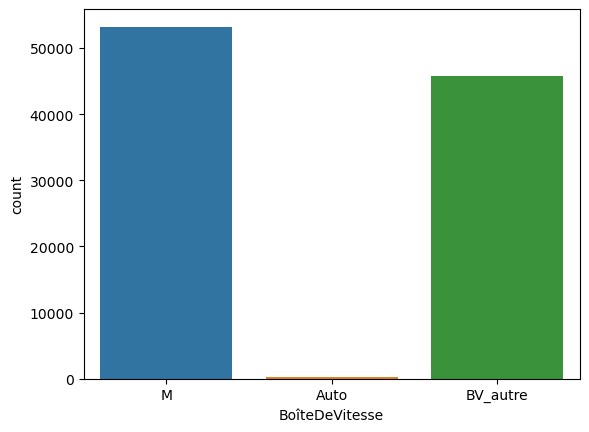

In [363]:
sns.countplot(x = "BoîteDeVitesse", data = df_1314)

<Axes: ylabel='count'>

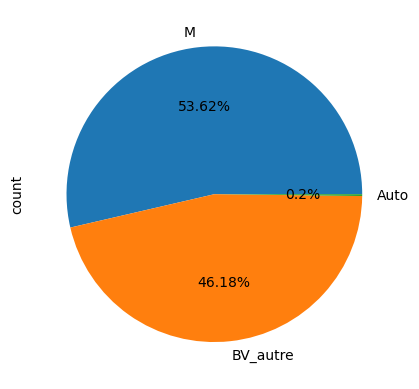

In [364]:
df_1314["BoîteDeVitesse"].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

##### 3.2.5.4 Analyse des categories par variable - "Variable Marque"

##### La Marque 'MERCEDES-BENZ'(39%) est plus représentée dans la variable Marque. Elle est suivie par la marque 'MERCEDES' (36%), 'VOLKSWAGEN' (15%). nous conservons les categories sans les modifier.

In [366]:
df_1314['Marque'].unique() 

array(['ALFA-ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'CADILLAC',
       'CHEVROLET', 'CITROEN', 'DACIA', 'DANGEL', 'FERRARI', 'FIAT',
       'FORD', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR',
       'JAGUAR LAND ROVER LIMITED', 'JEEP', 'KIA', 'LADA', 'LAMBORGHINI',
       'LANCIA', 'LEXUS', 'LOTUS', 'MASERATI', 'MAYBACH', 'MAZDA',
       'MERCEDES AMG', 'MERCEDES-BENZ', 'MIA', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'QUATTRO', 'RENAULT',
       'RENAULT TECH', 'ROLLS-ROYCE', 'SEAT', 'SKODA', 'SMART',
       'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'VOLKSWAGEN',
       'VOLVO', 'LAND ROVER', 'MERCEDES'], dtype=object)

<Axes: xlabel='Marque', ylabel='count'>

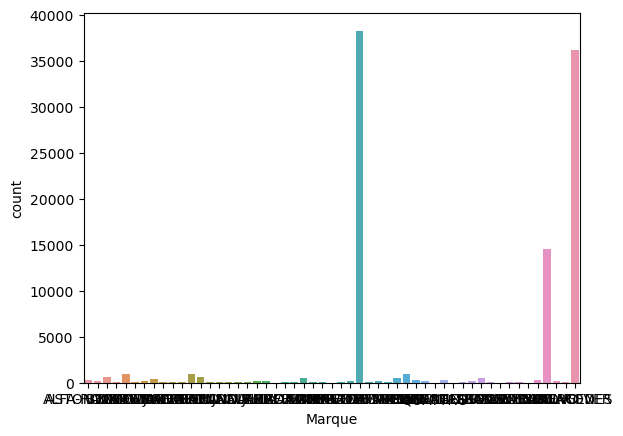

In [367]:
sns.countplot(x = "Marque", data = df_1314)

##### 3.2.5.5 Analyse des categories par variable - "Variable Carburant"


##### Au niveau du carburant, les categories les plus representées sont : le GO : gazole GP / ES : bicarburation essence / Gaz de Pétrole Liquéfié – GPL (données consommations GPL) (87,63%). ES : essence sans plomb 95 (11,35%). En gros ces deux categories representent à elles seules 99% des données de la variable Carburant. La variable EL : électrique ne contribuant pas à l'émission de CO2 sera supprimée. L’analyse de la variable Carburant, nous amenène a créer une catégorie autre pour toutes les catégories autres que ES et GO qui représentent à elles seules 99% des données de la variable Carburant.

In [369]:
df_1314['Carburant'].unique()

array(['ES', 'GO', 'EH', 'EE', 'EL', 'GH', 'ES/GP', 'GP/ES', 'ES/GN',
       'GN/ES', 'FE', 'GN', 'GL'], dtype=object)

<Axes: xlabel='Carburant', ylabel='count'>

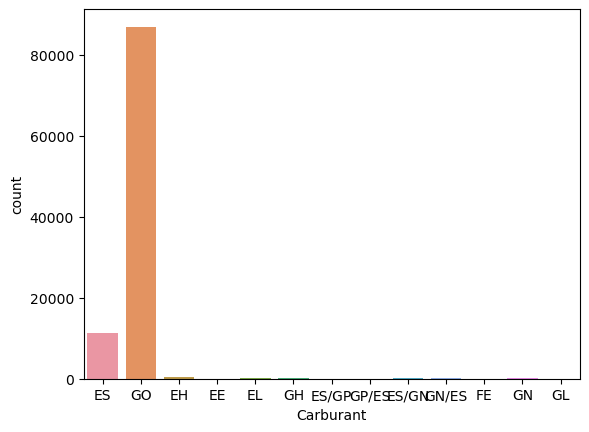

In [370]:
sns.countplot(x = "Carburant", data = df_1314)

In [371]:
# Identification des vCategories à supprimer 
df_1314_EL = df_1314[df_1314['Carburant'] == 'EL'].index # index des lignes contenant les EL
# Suppression des catégories
df_1314 = df_1314.drop(df_1314_EL)

In [372]:
dico_Carburant = {'ES' : 'ES',
                  'GO' : 'GO',
                  'EH':'C_autre',
                  'EE':'C_autre',
                  'GH':'C_autre',
                  'ES/GP':'C_autre',
                  'GP/ES':'C_autre',
                  'ES/GN':'C_autre',
                  'GN/ES':'C_autre',
                  'FE':'C_autre',
                  'GN':'C_autre',
                  'GL':'C_autre',
                   }
df_1314['Carburant'] = df_1314['Carburant'].map(dico_Carburant) # Mise en place d'un dictionnaire et utilisation de la methode map pour ajuster les catégories
df_1314['Carburant'].unique()

array(['ES', 'GO', 'C_autre'], dtype=object)

<Axes: xlabel='Carburant', ylabel='count'>

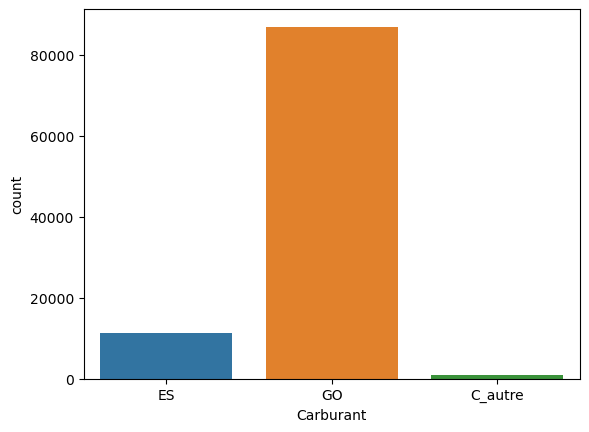

In [373]:
sns.countplot(x = "Carburant", data = df_1314)

In [374]:
# EE : essence / électrique (rechargeable)
# EH : essence / électrique (non rechargeable)
# EL : électrique
# ES : essence sans plomb 95
# ES / GN : bicarburation essence / Gaz Naturel Véhicule – GNV (données consommations essence)
# ES / GP : bicarburation essence / Gaz de Pétrole Liquéfié – GPL (données consommations essence)
# FE : véhicule E85 (ou superéthanol-E85)
# GH : gazole / électrique (non rechargeable)
# GL : gazole / électrique (rechargeable)
# GN : monocarburation Gaz Naturel Véhicule – GNV
# GN / ES : bicarburation essence / Gaz Naturel Véhicule – GNV (données consommations GNV)
# GO : gazole GP / ES : bicarburation essence / Gaz de Pétrole Liquéfié – GPL (données consommations GPL)
# H2 : hydrogène

##### 3.2.5.6 Analyse des categories par variable - "Variable Hybride"


##### Nous conservons cette variable sans rien toucher.

In [376]:
df_1314['Hybride'].unique()

array(['non', 'oui'], dtype=object)

<Axes: xlabel='Hybride', ylabel='count'>

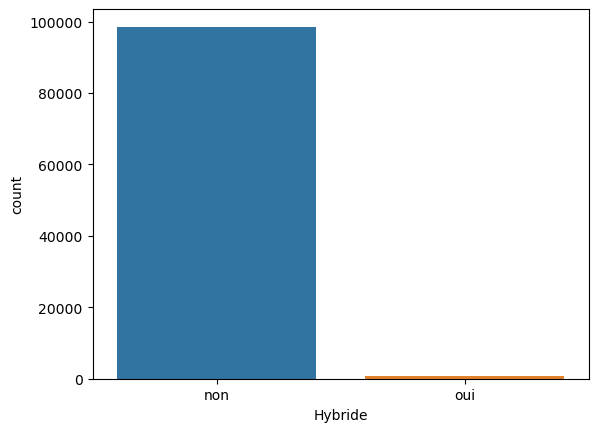

In [377]:
sns.countplot(x = "Hybride", data = df_1314) # cette variable ne sera pas prise en compte pour le reste du projet.

#### 3.2.6 Relation Variables Categorielles/Target (Cible)

#### 3.2.6.1 Relation Variables Categorielles/Target - Visualisation

##### Dans le but de comprendre les liens entre les variables qualitatives et la variable cible. Nous avons representer la variable cible en fonction de la variables "Marque" en faisant varier les categories des variables :'Carrosserie','gamme','Boîte de vitesse','Carburant','Hybride'. Globalement, il est difficile de se prononcer sur le lien entre le C02 et ces variables. On remarque quand même une certaine tendance entre la variables cible et les variables: 'gamme','Carburant','Hybride'. Pour comprendre tout ça, il sera important de faire des tests statistiques. Le **test ANOVA** est adapté pour ces types de situation, car il  permet d'étudier le lien entre une variable qualitative (ou catégorielle) et une variable quantitative.

- ***"Variable gamme"***

<Figure size 2000x1000 with 0 Axes>

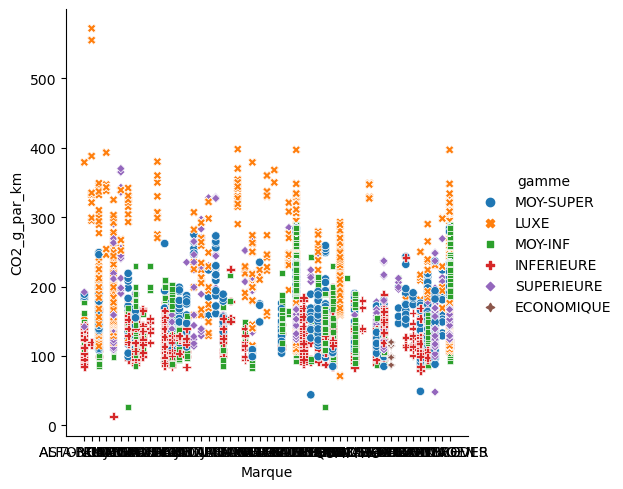

In [381]:
plt.figure(figsize=(20,10))
#sns.relplot(x = "gamme", y = "CO2 (g/km)", hue = "pos", data = df_2013)
sns.relplot(x = "Marque", y = "CO2_g_par_km",hue = "gamme", style = "gamme", data = df_1314)
plt.show() 

- ***"Variable Carrosserie"***

<Figure size 2000x1000 with 0 Axes>

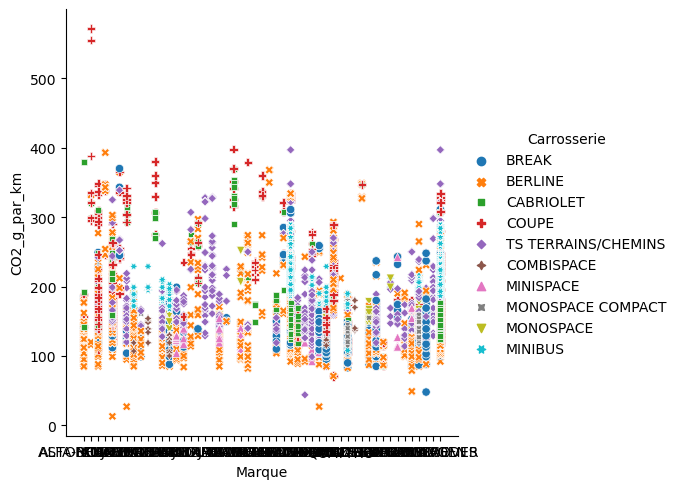

In [383]:
plt.figure(figsize=(20,10))
#sns.relplot(x = "gamme", y = "CO2 (g/km)", hue = "pos", data = df_2013)
sns.relplot(x = "Marque", y = "CO2_g_par_km",hue = "Carrosserie", style = "Carrosserie", data = df_1314)
plt.show() 

- ***"Variable BoîteDeVitesse"***

<Figure size 2000x1000 with 0 Axes>

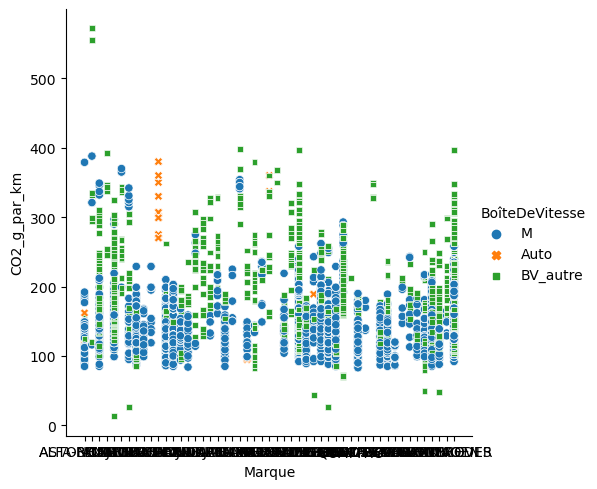

In [385]:
plt.figure(figsize=(20,10))
#sns.relplot(x = "gamme", y = "CO2 (g/km)", hue = "pos", data = df_2013)
sns.relplot(x = "Marque", y = "CO2_g_par_km",hue = "BoîteDeVitesse", style = "BoîteDeVitesse", data = df_1314)
plt.show() 

- ***"Variable Carburant"***

<Figure size 2000x1000 with 0 Axes>

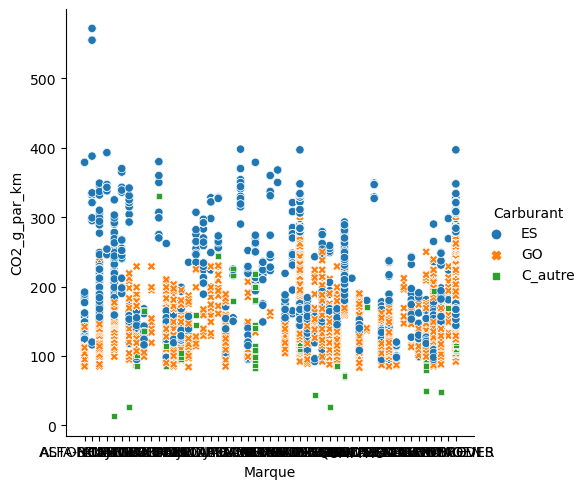

In [387]:
plt.figure(figsize=(20,10))
#sns.relplot(x = "gamme", y = "CO2 (g/km)", hue = "pos", data = df_2013)
sns.relplot(x = "Marque", y = "CO2_g_par_km",hue = "Carburant", style = "Carburant", data = df_1314)
plt.show()

- ***"Variable Hybride"***

<Figure size 2000x1000 with 0 Axes>

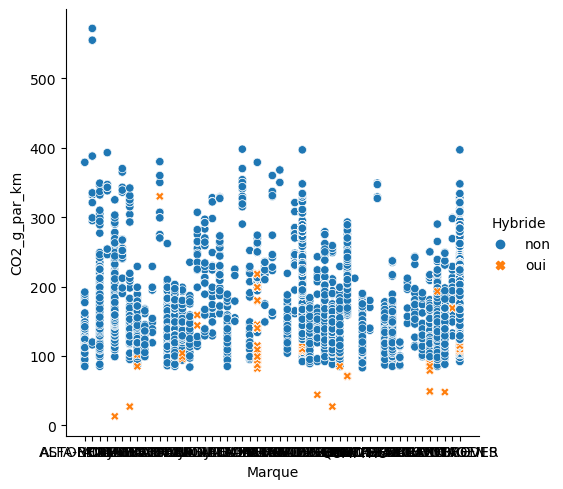

In [389]:
plt.figure(figsize=(20,10))
#sns.relplot(x = "gamme", y = "CO2 (g/km)", hue = "pos", data = df_2013)
sns.relplot(x = "Marque", y = "CO2_g_par_km",hue = "Hybride", style = "Hybride", data = df_1314)
plt.show()

#### 3.2.6.2 Relation Variables Categorielles/Target - Tests Statistiques ANOVA

##### Dans cette partie, il s'agissait de faire des tests statistique de type ANOVA pour confirmer ou infirmer le lien entre la variable cible et les variables categorielles ci-dessous. les tests ont confirmé le lien entre le CO2 et toutes les variables categorielles concervées.
- CO2 (g/km) Vs Carrosserie
- CO2 (g/km) Vs Marque
- CO2 (g/km) Vs gamme
- CO2 (g/km) Vs Boîte de vitesse
- CO2 (g/km) Vs Carburant
- CO2 (g/km) Vs Hybride

- ***CO2_g_par_km Vs Carrosserie*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la Carrosserie sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la Carrosserie sur l'émission du CO2

In [392]:
result_Carrosserie = statsmodels.formula.api.ols("CO2_g_par_km ~ Carrosserie", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_Carrosserie)
display(table)

df        sum_sq       mean_sq            F  PR(>F)
Carrosserie      9.0  5.456024e+07  6.062248e+06  8116.494284     0.0
Residual     99185.0  7.408175e+07  7.469048e+02          NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. cela veut dire qu'il y a effet significatif de la Carrosserie sur l'émission du CO2

- ***CO2_g_par_km Vs gamme*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la gamme sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la gamme sur l'émission du CO2

In [395]:
result_gamme = statsmodels.formula.api.ols("CO2_g_par_km ~ gamme", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_gamme)
display(table)

df        sum_sq       mean_sq            F  PR(>F)
gamme         5.0  2.933759e+07  5.867518e+06  5860.699433     0.0
Residual  99189.0  9.930440e+07  1.001163e+03          NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. Cela veut dire qu'il y a effet significatif de la gamme sur l'émission du CO2

- ***CO2_g_par_km Vs Marque*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la Marque sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la Marque sur l'émission du CO2

In [398]:
result_Marque = statsmodels.formula.api.ols("CO2_g_par_km ~ Marque", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_Marque)
display(table)

df        sum_sq        mean_sq           F  PR(>F)
Marque       50.0  3.583455e+07  716690.938692  765.624029     0.0
Residual  99144.0  9.280744e+07     936.087311         NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. Cela veut dire qu'il y a effet significatif de la Marque sur l'émission du CO2

- ***CO2_g_par_km Vs BoîteDeVitesse*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la Boîte_de_vitesse sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la Boîte_de_vitesse sur l'émission du CO2

In [401]:
result_BoîteDeVitesse = statsmodels.formula.api.ols("CO2_g_par_km ~ BoîteDeVitesse", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_BoîteDeVitesse)
display(table)

df        sum_sq       mean_sq            F  PR(>F)
BoîteDeVitesse      2.0  1.136510e+07  5.682549e+06  4806.261816     0.0
Residual        99192.0  1.172769e+08  1.182322e+03          NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. Cela veut dire qu'il y a effet significatif de la BoîteDeVitesse sur l'émission du CO2

- ***CO2_g_par_km Vs Carburant*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la Carburant sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la Carburant sur l'émission du CO2

In [404]:
result_Carburant = statsmodels.formula.api.ols("CO2_g_par_km ~ Carburant", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_Carburant)
display(table)

df        sum_sq       mean_sq            F  PR(>F)
Carburant      2.0  2.892680e+06  1.446340e+06  1140.883988     0.0
Residual   99192.0  1.257493e+08  1.267736e+03          NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. Cela veut dire qu'il y a effet significatif du Carburant sur l'émission du CO2

- ***CO2_g_par_km Vs Hybride*** 

Hypothèse:
- 𝐻0 : Il n'y a pas d'effet significatif de la technologie Hybride sur l'émission du CO2
- 𝐻1 : Il y a un effet significatif de la technologie Hybride sur l'émission du CO2

In [407]:
result_Hybride = statsmodels.formula.api.ols("CO2_g_par_km ~ Hybride", data=df_1314).fit()
table = statsmodels.api.stats.anova_lm(result_Hybride)
display(table)

df        sum_sq       mean_sq            F  PR(>F)
Hybride       1.0  2.628168e+06  2.628168e+06  2068.787621     0.0
Residual  99193.0  1.260138e+08  1.270390e+03          NaN     NaN

##### La valeur 𝑃𝑅(>𝐹) est inferieur à 5% donc on rejette H0 et on conclut H1. Cela veut dire qu'il y a effet significatif de la technologie Hybride sur l'émission du CO2

#### 3.2.7 Relation Variables Quantitatives/Target (Cible)

##### Le CO2 est corrélé avec les variables 'PuissanceMaximale_kW' et 'masseVideEuroMax_kg' respectivement à 36% et à 69%.

C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

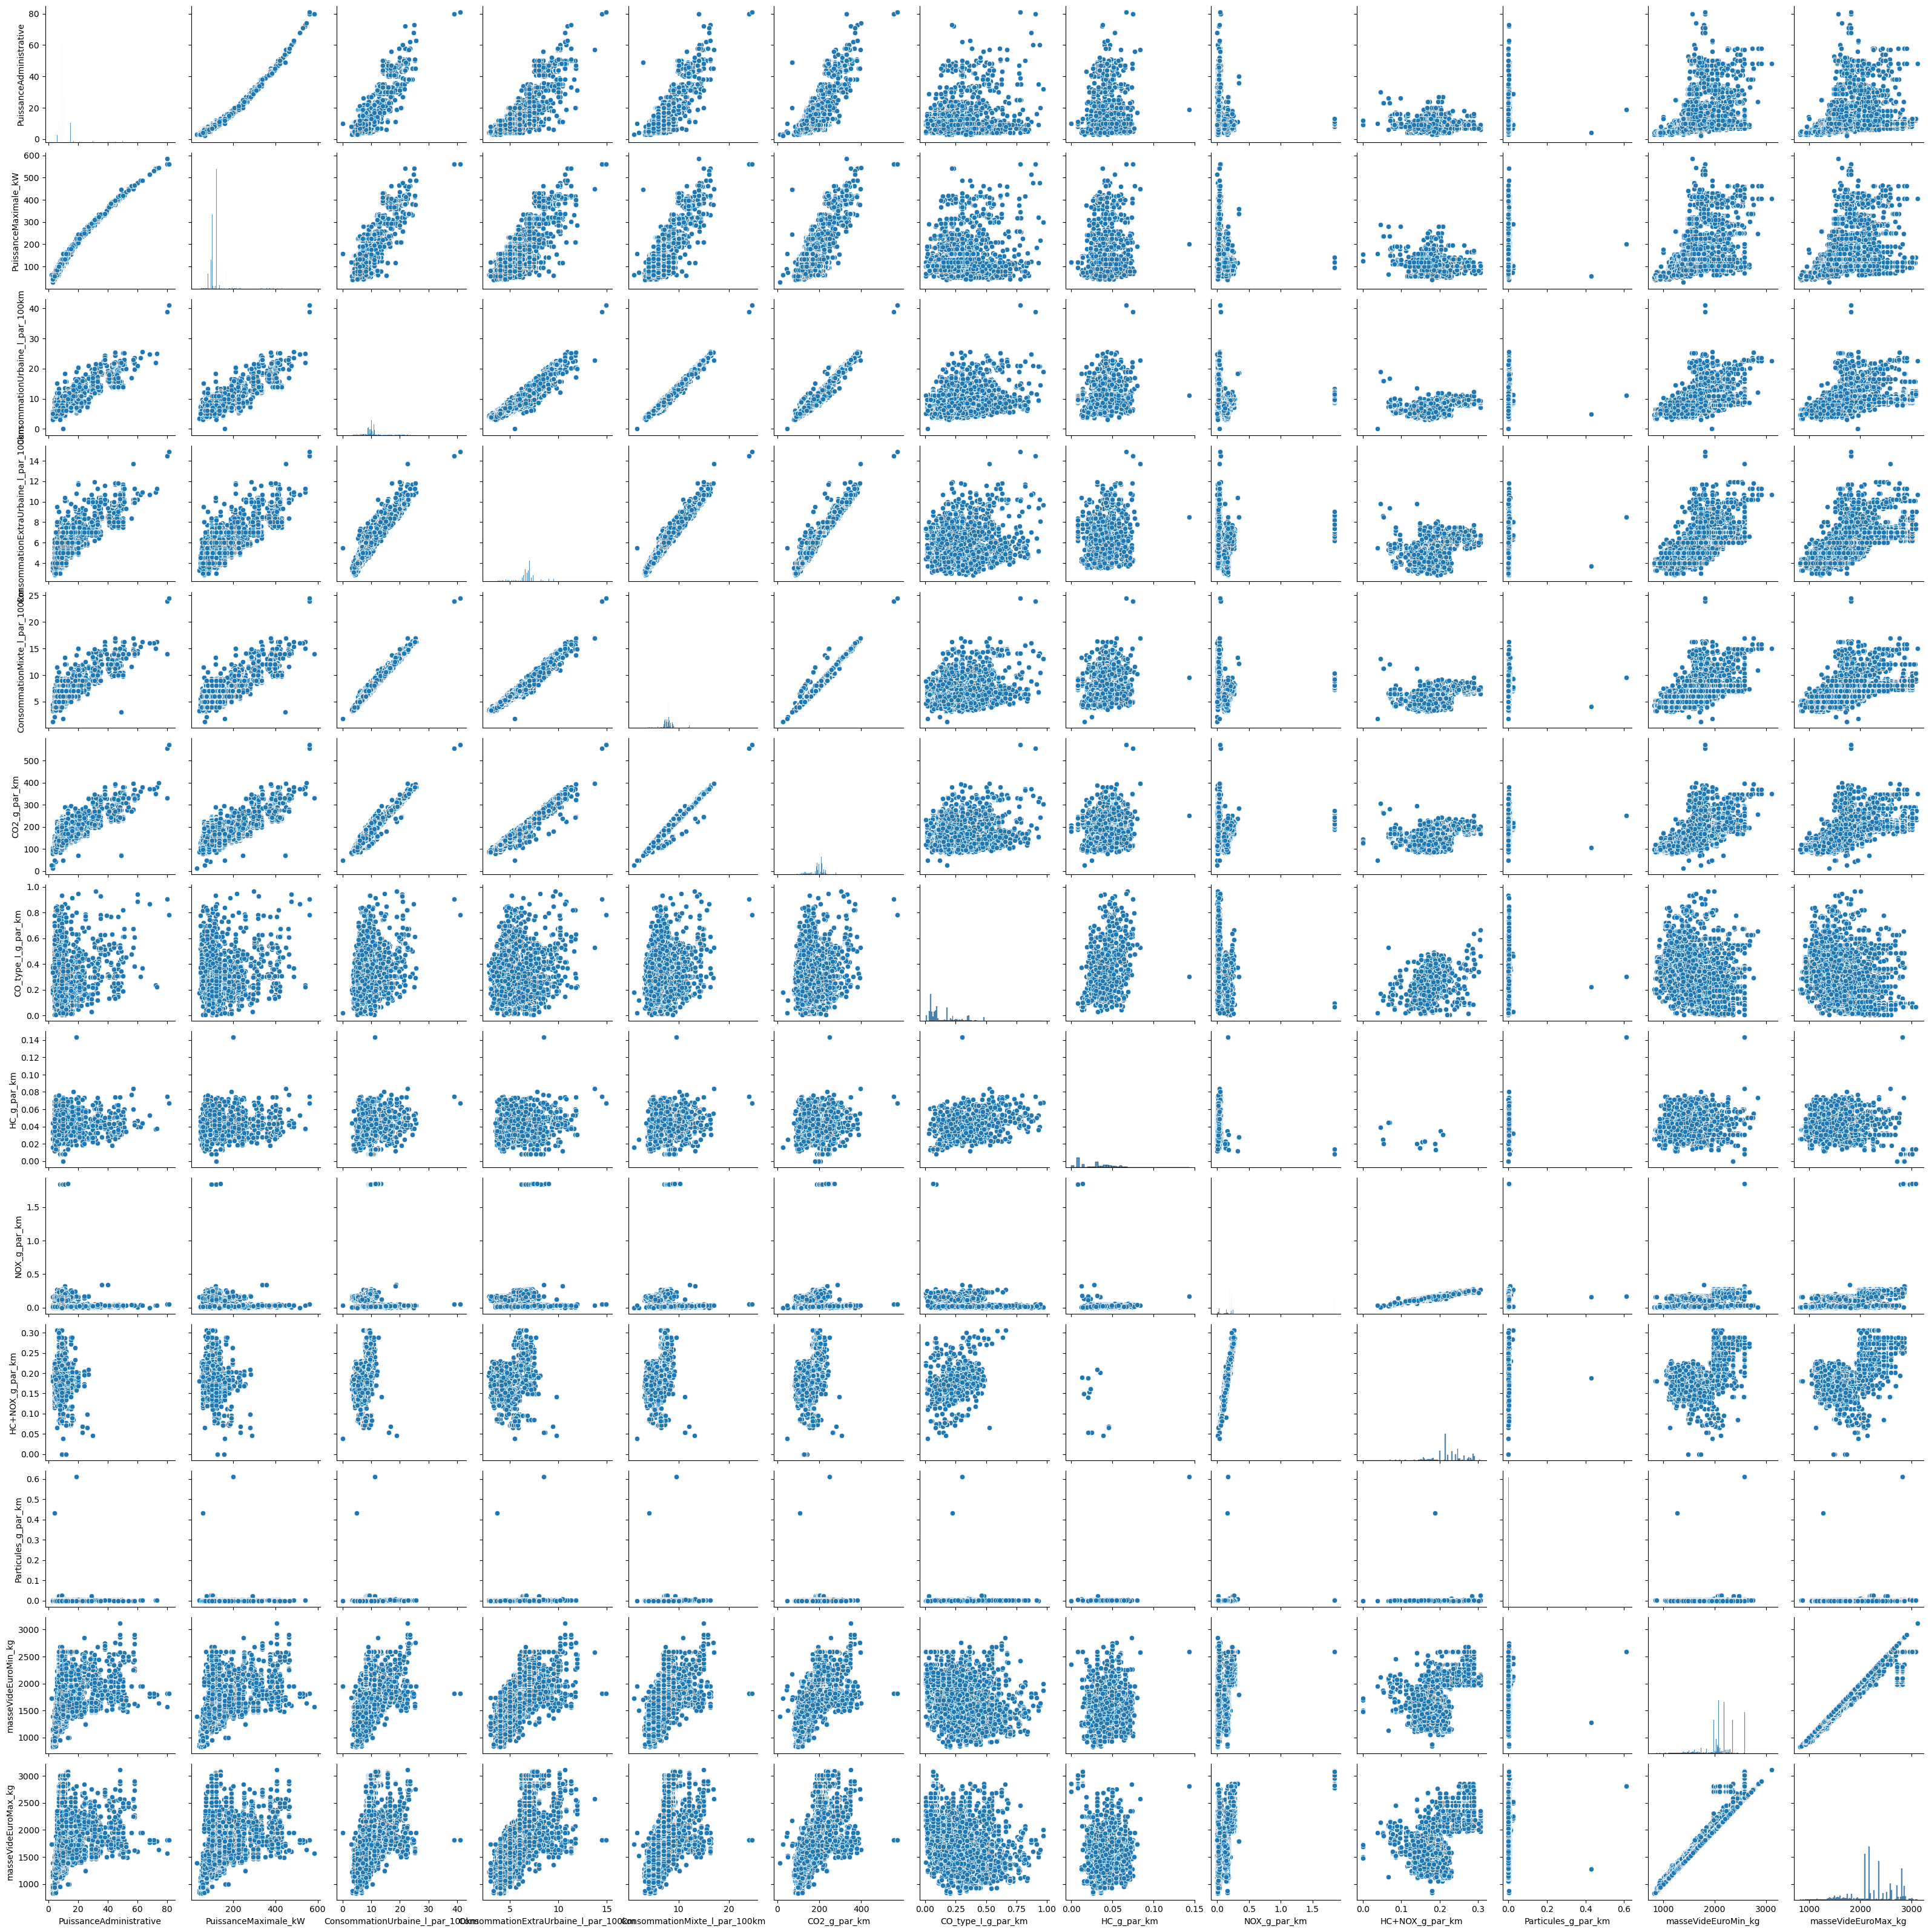

In [410]:
sns.pairplot(df_1314)

<Axes: title={'center': 'Correlation'}>

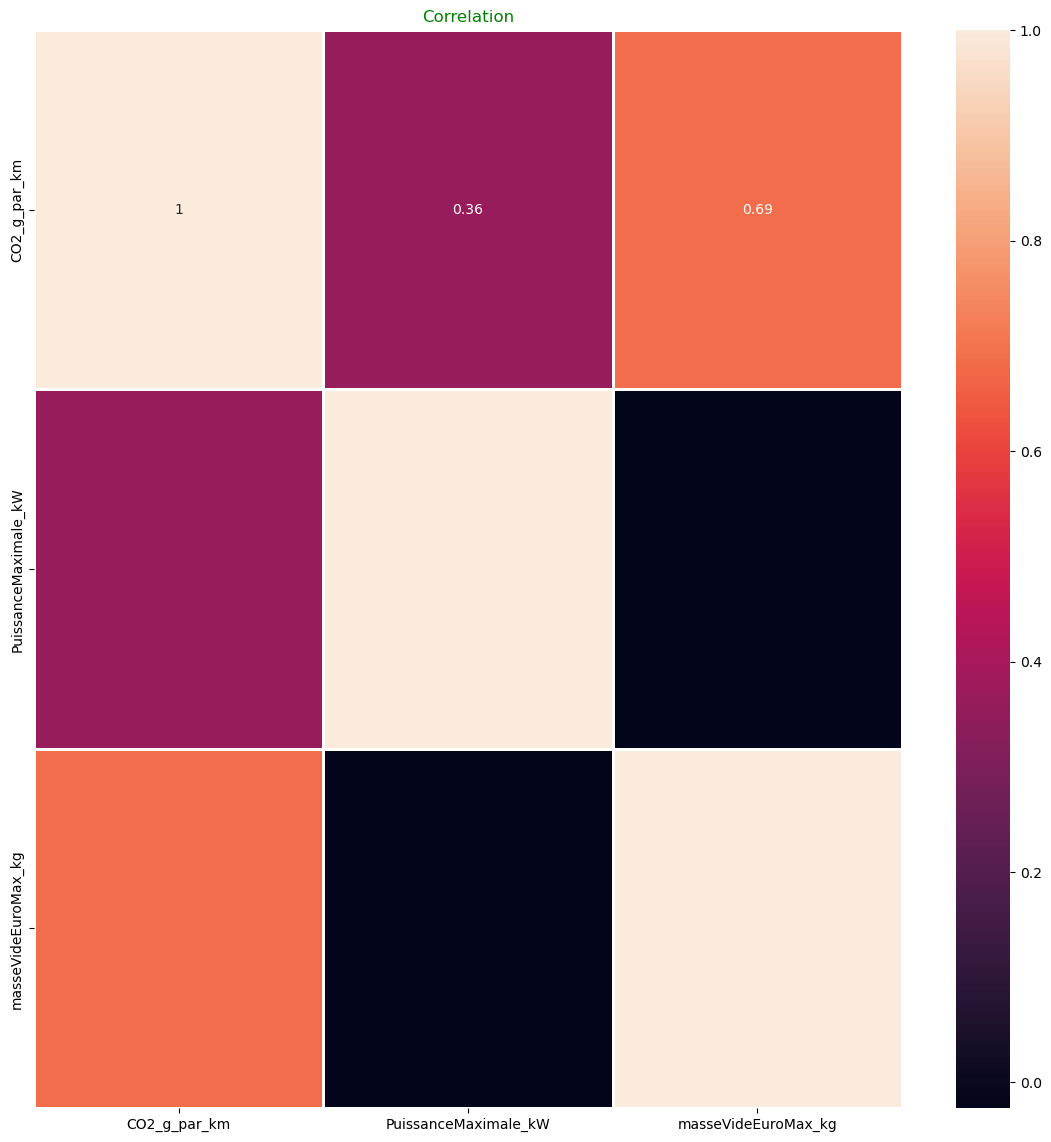

In [411]:
df_1314_nu = df_2013[['CO2_g_par_km','PuissanceMaximale_kW','masseVideEuroMax_kg']] # si nous enlevons les variables à supprimer d'aprè-s les analyses précédentes
plt.figure(figsize=(14,14));
plt.title("Correlation",color="green")
sns.heatmap(df_1314_nu.corr(),linewidth=1,annot=True) 

## 4. Pre-processing

##### Le pre-processing c'est l'étape qui consiste à préparer nos données avant de les fournir à la machine pour son apprentissage. Le but est de mettre nos données dans un format propice au développement de modèles de Machine Learning ou de Deep Learning mais également d'avoir des données les plus propre possible afin d'améliorer la performance de notre modèle. Pour ça il existe une tonne d'opération possible. On peut encoder nos données, les normaliser, nettoyer les valeurs manquantes, nettoyer les valeurs aberantes, selectionner les meilleurs variables, créer de nouvelles variables, extraire certaines caractéristiques....il existe bcp d'opérations possible.

### 4.1 Mise en forme du DataSet

##### Dans l'analyse opératoire nous avons identifié des variables (colonnes) et des valeurs aberantes (lignes) à supprimer. L'objectif de cette partie est de supprimer toutes ces données pour avoir un DataSet plus propre à être normaliser, encodé et imputé.

In [414]:
# Suppressions des variables à ne pas prendre en compte dans la suite su projet
df_1314 = df_1314.drop(['PuissanceAdministrative','ConsommationExtraUrbaine_l_par_100km','ConsommationUrbaine_l_par_100km','ConsommationMixte_l_par_100km',
                        'CO_type_I_g_par_km','NOX_g_par_km','HC+NOX_g_par_km','Particules_g_par_km','masseVideEuroMin_kg','Champ_V9','CNIT',
                        'TVV','ModèleDossier','ModèleUTAC','DésignationCommerciale','HC_g_par_km','Date de mise à jour'], axis = 1)
df_1314.columns

Index(['Marque', 'Carburant', 'Hybride', 'PuissanceMaximale_kW',
       'BoîteDeVitesse', 'CO2_g_par_km', 'masseVideEuroMax_kg', 'Carrosserie',
       'gamme', 'Class_CO2'],
      dtype='object')

In [415]:
df_1314.head() # le dataset final pour l'instant. il reste des catégories (des lignes) à supprimer et à ajuster pour avoir un dataset Clean pour le pre-processing

Marque Carburant Hybride  PuissanceMaximale_kW BoîteDeVitesse  \
0  ALFA-ROMEO        ES     non                 147.0              M   
1  ALFA-ROMEO        GO     non                 125.0              M   
2  ALFA-ROMEO        GO     non                 100.0              M   
3  ALFA-ROMEO        GO     non                 100.0              M   
4  ALFA-ROMEO        GO     non                 125.0              M   

   CO2_g_par_km  masseVideEuroMax_kg Carrosserie      gamme Class_CO2  
0         182.0                 1505       BREAK  MOY-SUPER         E  
1         136.0                 1565     BERLINE  MOY-SUPER         C  
2         134.0                 1565     BERLINE  MOY-SUPER         C  
3         134.0                 1565     BERLINE  MOY-SUPER         C  
4         139.0                 1565     BERLINE  MOY-SUPER         C

In [416]:
df_1314_PMax = df_1314[df_1314['PuissanceMaximale_kW'] > 500].index # Suppression des valeurs aberantes sur la distribution de la puissance Max
df_1314 = df_1314.drop(df_1314_PMax)

In [417]:
df_1314.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99176 entries, 0 to 99893
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Marque                99176 non-null  object  
 1   Carburant             99176 non-null  object  
 2   Hybride               99176 non-null  object  
 3   PuissanceMaximale_kW  98983 non-null  float64 
 4   BoîteDeVitesse        99176 non-null  object  
 5   CO2_g_par_km          99176 non-null  float64 
 6   masseVideEuroMax_kg   99176 non-null  int64   
 7   Carrosserie           99176 non-null  object  
 8   gamme                 99176 non-null  object  
 9   Class_CO2             99171 non-null  category
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 7.7+ MB


In [418]:
(df_1314.isna().sum()/df_1314.shape[0]).sort_values(ascending=True) # seule la variable PuissanceMaximale_kW contient des valeur manquantes

Marque                  0.000000
Carburant               0.000000
Hybride                 0.000000
BoîteDeVitesse          0.000000
CO2_g_par_km            0.000000
masseVideEuroMax_kg     0.000000
Carrosserie             0.000000
gamme                   0.000000
Class_CO2               0.000050
PuissanceMaximale_kW    0.001946
dtype: float64

### 4.2 Imputation

##### Limputation se refère au fait qu'on remplace les valeurs manquantes dans le DataSet. Nous avons des valeurs manquantes que dans la variables "PuissanceMaximale_kW ". Nous remplaçons ces valeurs par la valeur mediane.

In [420]:
df_1314.fillna({'PuissanceMaximale_kW': df_1314['PuissanceMaximale_kW'].median()}, inplace=True)

In [421]:
df_1314.head()

Marque Carburant Hybride  PuissanceMaximale_kW BoîteDeVitesse  \
0  ALFA-ROMEO        ES     non                 147.0              M   
1  ALFA-ROMEO        GO     non                 125.0              M   
2  ALFA-ROMEO        GO     non                 100.0              M   
3  ALFA-ROMEO        GO     non                 100.0              M   
4  ALFA-ROMEO        GO     non                 125.0              M   

   CO2_g_par_km  masseVideEuroMax_kg Carrosserie      gamme Class_CO2  
0         182.0                 1505       BREAK  MOY-SUPER         E  
1         136.0                 1565     BERLINE  MOY-SUPER         C  
2         134.0                 1565     BERLINE  MOY-SUPER         C  
3         134.0                 1565     BERLINE  MOY-SUPER         C  
4         139.0                 1565     BERLINE  MOY-SUPER         C

In [422]:
(df_1314.isna().sum()/df_1314.shape[0]).sort_values(ascending=True) # plus de NaN dans le dataset

Marque                  0.00000
Carburant               0.00000
Hybride                 0.00000
PuissanceMaximale_kW    0.00000
BoîteDeVitesse          0.00000
CO2_g_par_km            0.00000
masseVideEuroMax_kg     0.00000
Carrosserie             0.00000
gamme                   0.00000
Class_CO2               0.00005
dtype: float64

### 4.3 Encodage

##### Quand on developpe un modèle de machine learning ou de Deep Learning, il est nécéssaire de présenter à la machine des valeurs numériques avec lesquelles elle puisse faire des calculs. Par consequent si notre  DataSet contient des données qualitatives sous forme de mots alors il est indispensable de convertir ces données en valeur numérique et c'est ce qu'on appelle l'encodage. Dans Sklearn, il existe 5 transformer d'encodage: LabelEncoder, LabelBinarizer, MultiLabelBinarizer, OneHotEncoder et OrdinalEncoder. Ces transformers permettent d'effectuer deux types d'encodage à savoir : l'encodage ordinal et l'encodage one hot. Dans le projet, nous utilisons le OneHotEncoder de Pandas get_duminies pour encoder nos variables explicatives. L'encodage de la variable cible "Class_CO2" se fera dans la partie modelisation de la rubrique classification. 

In [514]:
# variables cible categorielle
df_1314CO2 = df_1314["Class_CO2"]

# Variables numériques sans la variable cible "CO2_g_par_km"

df_1314Nu = df_1314[['PuissanceMaximale_kW','masseVideEuroMax_kg']]

# Variable Categorielle sans la variable cible Class_CO2

df_1314Cat = df_1314.drop(["PuissanceMaximale_kW","masseVideEuroMax_kg", "Class_CO2"], axis = 1)

In [516]:
df_1314Cat = pd.get_dummies(df_1314Cat[df_1314Cat.columns], drop_first=False) # utilisation de la methode drop_first=False est utilisé ici pour éviter les problèmes de colinéalités

In [519]:
df_1314Cat.head()

CO2_g_par_km  Marque_ALFA-ROMEO  Marque_ASTON MARTIN  Marque_AUDI  \
0         182.0               True                False        False   
1         136.0               True                False        False   
2         134.0               True                False        False   
3         134.0               True                False        False   
4         139.0               True                False        False   

   Marque_BENTLEY  Marque_BMW  Marque_CADILLAC  Marque_CHEVROLET  \
0           False       False            False             False   
1           False       False            False             False   
2           False       False            False             False   
3           False       False            False             False   
4           False       False            False             False   

   Marque_CITROEN  Marque_DACIA  Marque_DANGEL  Marque_FERRARI  Marque_FIAT  \
0           False         False          False           False        False   
1           False         False          False           False        False   
2           False         False          False           False        False   
3           False         False          False           False        False   
4           False         False          False           False        False   

   Marque_FORD  Marque_HONDA  Marque_HYUNDAI  Marque_INFINITI  Marque_JAGUAR  \
0        False         False           False            False          False   
1        False         False           False            False          False   
2        False         False           False            False          False   
3        False         False           False            False          False   
4        False         False           False            False          False   

   Marque_JAGUAR LAND ROVER LIMITED  Marque_JEEP  ...  Hybride_oui  \
0                             False        False  ...        False   
1                             False        False  ...        False   
2                             False        False  ...        False   
3                             False        False  ...        False   
4                             False        False  ...        False   

   BoîteDeVitesse_Auto  BoîteDeVitesse_BV_autre  BoîteDeVitesse_M  \
0                False                    False              True   
1                False                    False              True   
2                False                    False              True   
3                False                    False              True   
4                False                    False              True   

   Carrosserie_BERLINE  Carrosserie_BREAK  Carrosserie_CABRIOLET  \
0                False               True                  False   
1                 True              False                  False   
2                 True              False                  False   
3                 True              False                  False   
4                 True              False                  False   

   Carrosserie_COMBISPACE  Carrosserie_COUPE  Carrosserie_MINIBUS  \
0                   False              False                False   
1                   False              False                False   
2                   False              False                False   
3                   False              False                False   
4                   False              False                False   

   Carrosserie_MINISPACE  Carrosserie_MONOSPACE  \
0                  False                  False   
1                  False                  False   
2                  False                  False   
3                  False                  False   
4                  False                  False   

   Carrosserie_MONOSPACE COMPACT  Carrosserie_TS TERRAINS/CHEMINS  \
0                          False                            False   
1                          False                            False   
2                          Fals

### 4.4 Normalisation

##### En data science, il est indispensable de normaliser nos données quantitatives, c'est à dire les mettre toutes sur une même echelle. Cela faclite considerablement l'apprentissage des modèles de ML qui sont basés sur la descente de gradient les calculs de distance ou les calculs de variance par exemple dans le cadre de la descente de gradient, si une valeur prend le dessus sur un autre alors, il devient plus difficile pour la fonction coût de converger vers son minimum. C'est pourquoi il est très important de normaliser tout nos données avant leur passage dans la machine. Pour ça, il existe plusieurs technique de normalisation et nous allons utiliser dans ce projet le transformer StandardScaler de Sklearn.

In [524]:
scaler = StandardScaler().fit(df_1314Nu) 
df_1314_SC = scaler.transform(df_1314Nu)

In [526]:
df_1314_SC = pd.DataFrame(df_1314_SC, columns=['PuissanceMaximale_kW', 'masseVideEuroMax_kg'])
df_1314_SC.head()

PuissanceMaximale_kW  masseVideEuroMax_kg
0              0.544329            -1.809856
1              0.071365            -1.667545
2             -0.466095            -1.667545
3             -0.466095            -1.667545
4              0.071365            -1.667545

### 4.5 Dataset final pour la modelisation

In [531]:
df_finalCat = pd.concat([pd.DataFrame(df_1314CO2, columns=["Class_CO2"]), df_1314_SC, df_1314Cat], axis = 1) # Dataset final pour la classification

In [537]:
df_finalCat.head(10)

Class_CO2  PuissanceMaximale_kW  masseVideEuroMax_kg  CO2_g_par_km  \
0         E              0.544329            -1.809856         182.0   
1         C              0.071365            -1.667545         136.0   
2         C             -0.466095            -1.667545         134.0   
3         C             -0.466095            -1.667545         134.0   
4         C              0.071365            -1.667545         139.0   
5         C              0.071365            -1.667545         139.0   
6         E              0.544329            -1.691263         186.0   
7         C              0.071365            -1.548952         139.0   
8         C             -0.466095            -1.548952         137.0   
9         C             -0.466095            -1.548952         137.0   

  Marque_ALFA-ROMEO Marque_ASTON MARTIN Marque_AUDI Marque_BENTLEY Marque_BMW  \
0              True               False       False          False      False   
1              True               False       False          False      False   
2              True               False       False          False      False   
3              True               False       False          False      False   
4              True               False       False          False      False   
5              True               False       False          False      False   
6              True               False       False          False      False   
7              True               False       False          False      False   
8              True               False       False          False      False   
9              True               False       False          False      False   

  Marque_CADILLAC Marque_CHEVROLET Marque_CITROEN Marque_DACIA Marque_DANGEL  \
0           False            False          False        False         False   
1           False            False          False        False         False   
2           False            False          False        False         False   
3           False            False          False        False         False   
4           False            False          False        False         False   
5           False            False          False        False         False   
6           False            False          False        False         False   
7           False            False          False        False         False   
8           False            False          False        False         False   
9           False            False          False        False         False   

  Marque_FERRARI Marque_FIAT Marque_FORD Marque_HONDA Marque_HYUNDAI  \
0          False       False       False        False          False   
1          False       False       False        False          False   
2          False       False       False        False          False   
3          False       False       False        False          False   
4          False       False       False        False          False   
5          False       False       False        False          False   
6          False       False       False        False          False   
7          False       False       False        False          False   
8          False       False       False        False          False   
9          False       False       False        False          False   

  Marque_INFINITI  ... Hybride_oui BoîteDeVitesse_Auto  \
0           False  ...       False               False   
1           False  ...       False               False   
2           False  ...       False               False   
3           False  ...       False               False   
4           False  ...       False               False   
5           False  ...       False               False   
6           False  ...       False               False   
7           False  ...       False               False   
8           False  ...       False               False   
9           False  ...       False               False   

  Bo

In [539]:
df_final = df_finalCat.dropna() # pour s'assurer que nous n'avons pas de NaN

In [541]:
df_final.to_csv("df_final.csv",index=False) # Nous exportons notre DataSet pour le charger dans le NoteBook pour la modelisation 

In [543]:
# Créons un objet y contenant la variable cible CO2_g_par_km et un object X contenant le reste des variables
X = df_final.drop('CO2_g_par_km', axis=1)
y = df_final['CO2_g_par_km']

In [545]:
# Séparons les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\232896332.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='y_train')
C:\Users\tchar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tchar\AppData\Local\Temp\ipykernel_43504\232896332.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

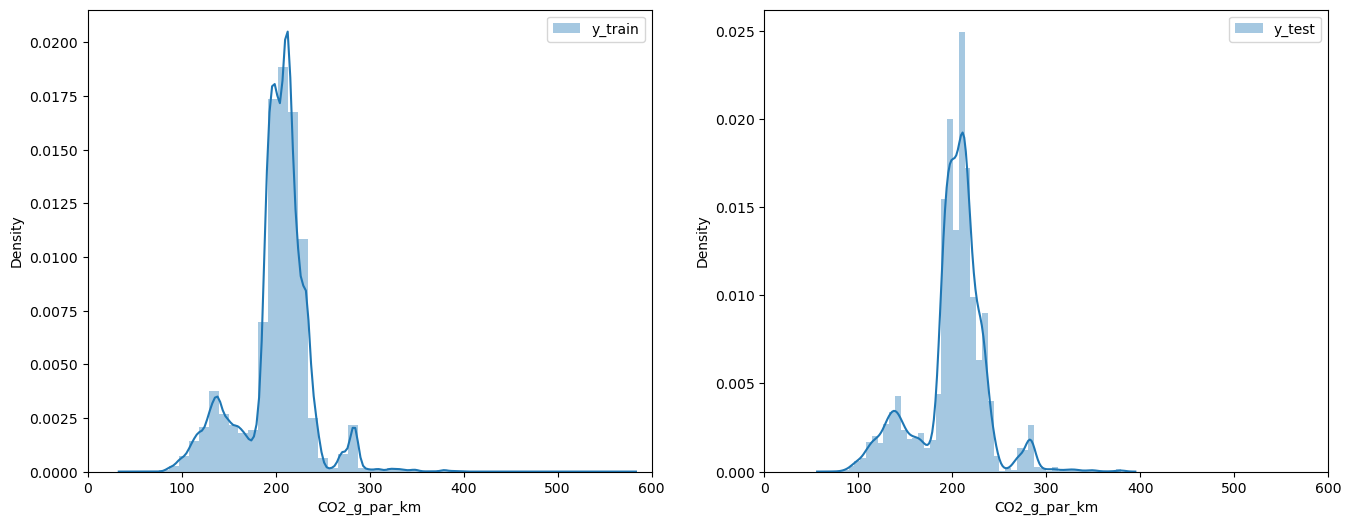

In [548]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
sns.distplot(y_train, label='y_train')
plt.xlim(0, 600)
plt.legend()

#plt.plot(t2, f(t2), "k")

plt.subplot(122)
sns.distplot(y_test, label='y_test')
plt.xlim(0, 600)
plt.legend()

### 4.7 Conclusion Preprocessing

##### Dans cette partie, nous avons utiliser la methode OneHotEncoder avec le transformer get_duminies() de Pandas pour  encoder nos variables categorielles, remplacer les valeur manquantes de la variable PuissanceMaximale_kW par sa mediane et enfin normalisé les variables quantitatives avec le transformer StandardScaler() de Sktlear. Nous avons également créé les objets contenant les variables cible et explicatives. Les données ont par la suite été séparées en un sensemble d'apprentissage (X_train, y_train) et un ensemble de test (X_test, y_test).

In [551]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98454 entries, 0 to 99175
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Class_CO2                         98454 non-null  category
 1   PuissanceMaximale_kW              98454 non-null  float64 
 2   masseVideEuroMax_kg               98454 non-null  float64 
 3   CO2_g_par_km                      98454 non-null  float64 
 4   Marque_ALFA-ROMEO                 98454 non-null  object  
 5   Marque_ASTON MARTIN               98454 non-null  object  
 6   Marque_AUDI                       98454 non-null  object  
 7   Marque_BENTLEY                    98454 non-null  object  
 8   Marque_BMW                        98454 non-null  object  
 9   Marque_CADILLAC                   98454 non-null  object  
 10  Marque_CHEVROLET                  98454 non-null  object  
 11  Marque_CITROEN                    98454 non-null  object  
